# Confirm that code can produce numbers in assignment

## The result of running this notebook is that the utilities approximately matches that in the assignment document when we set gamma = 0.946

### Results of running this notebook:

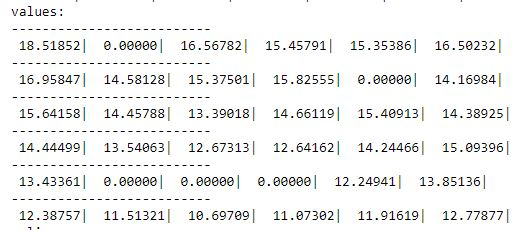

In [216]:
from IPython.display import Image

Image(filename = "confirm_assignment_values_policyiteration.JPG", width = 600, height = 300)

### Utilities in the assignment document:

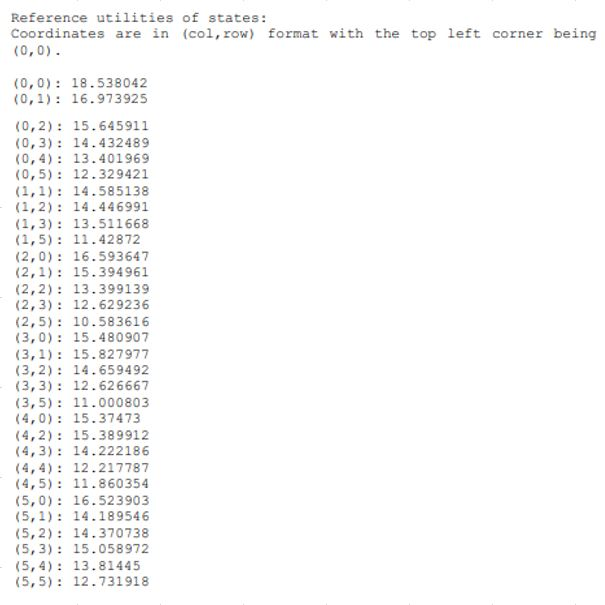

In [217]:
Image(filename = "utilities_in_assigment_document.JPG", width = 600, height = 300)

### Utilities in the assignment document (in grid format for visualisation and comparison):

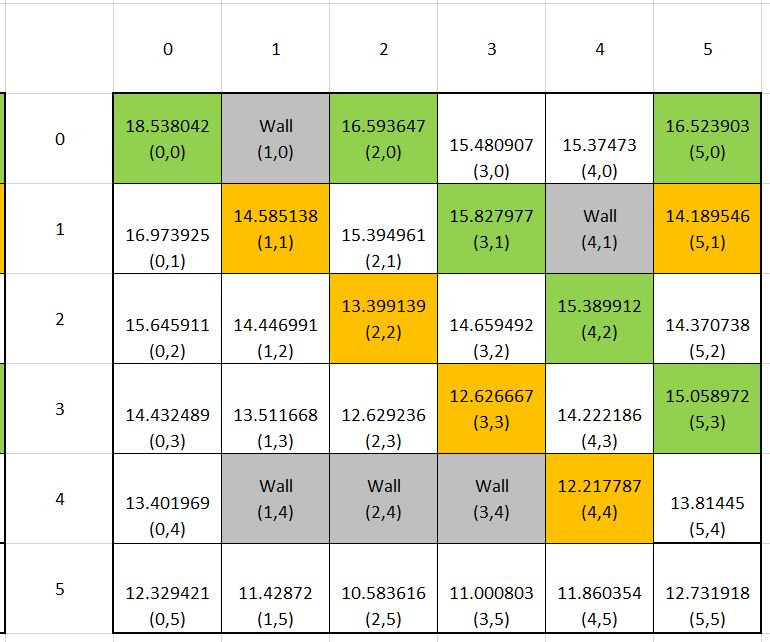

In [218]:
Image(filename = "utilities_in_assigment_document(grid).JPG", width = 600, height = 300)

# ------------------------------------------------------------------------------------------------



# ------------------------------------------------------------------------------------------------

### Please note that (row,col) format is used at first

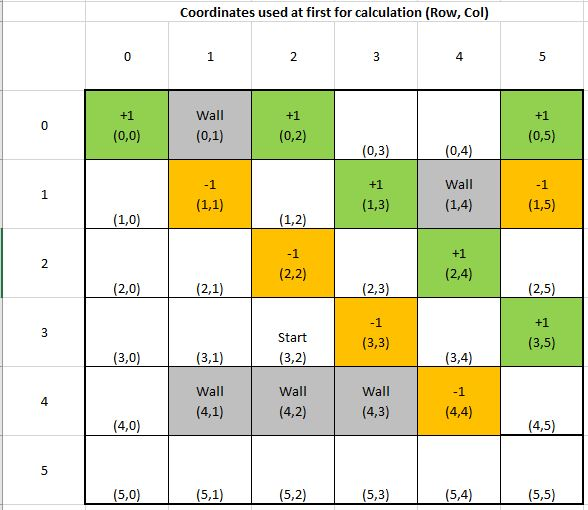

In [213]:
Image(filename = "coordinates_used_first_row,col.JPG", width = 600, height = 300)

In [153]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

class Grid:
    def __init__(self, width, height, start):  #start is a tuple of 2 integars
        self.width = width
        self.height = height
        self.i = start[0]
        self.j = start[1]
        
    def set(self, rewards, actions):  #set the rewards and actions of the environment
        #rewards in dict of: (i, j): (row, col): reward
        #actions in dict of: (i, j): A (row, col): list of possible actions
        self.rewards = rewards
        self.actions = actions  #enumerate all the possible actions that can take you to new state
    
    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]
        
    def current_state(self):
        return (self.i, self.j)

    def is_terminal(self, s):
        return s not in self.actions
    
    def move(self, action):
        #check if legal move first
        if action in self.actions[(self.i, self.j)]:
            if action == 'U':
                self.i -= 1
            elif action == 'D':
                self.i += 1
            elif action == 'R':
                self.j += 1
            elif action == 'L':
                self.j -= 1
        else:
            pass
        return self.rewards.get((self.i, self.j), 0)
    
    def undo_move(self, action):
        if action == 'U':
            self.i += 1
        elif action == 'D':
            self.i -= 1
        elif action == 'R':
            self.j -= 1
        elif action == 'L':
            self.j += 1
            
        #raise an exception if we arrive somewhere we shouldn't be
        assert(self.current_state() in self.all_states())
    
    def game_over(self):
        #returns true if game is over, else false
        return (self.i, self.j) not in self.actions
    
    def all_states(self):
        return set(list(self.actions.keys()) + list(self.rewards.keys()))
    
def standard_grid():
    #define a grid that describes the reward for arriving at each state
    g = Grid(6, 6, (3, 2))
    rewards = {(0,0):1, (0,2):1, (0,5):1, (1,3):1, (2,4):1, (3,5):1, (1,1):-1, (1,5):-1, (2,2):-1, (3,3):-1, (4,4):-1}
    actions = {
        (0,0): ('D'),
        (0,2): ('R', 'D'),
        (0,3): ('R', 'D', 'L'),
        (0,4): ('R', 'L'),
        (0,5): ('D', 'L'),
        (1,0): ('U', 'R', 'D'),
        (1,1): ('R', 'D', 'L'),
        (1,2): ('U', 'R', 'D', 'L'),
        (1,3): ('U', 'D', 'L'),
        (1,5): ('U', 'D'),
        (2,0): ('U', 'R', 'D'),
        (2,1): ('U', 'R', 'D', 'L'),
        (2,2): ('U', 'R', 'D', 'L'),
        (2,3): ('U', 'R', 'D', 'L'),
        (2,4): ('R', 'D', 'L'),
        (2,5): ('U', 'D', 'L'),
        (3,0): ('U', 'R', 'D'),
        (3,1): ('U', 'R', 'L'),
        (3,2): ('U', 'R', 'L'),
        (3,3): ('U', 'R', 'L'),
        (3,4): ('U', 'R', 'D', 'L'),
        (3,5): ('U', 'D', 'L'),
        (4,0): ('U', 'D'),
        (4,4): ('U', 'R', 'D'),
        (4,5): ('U', 'D', 'L'),
        (5,0): ('U', 'R'),
        (5,1): ('R', 'L'),
        (5,2): ('R', 'L'),
        (5,3): ('R', 'L'),
        (5,4): ('U', 'R', 'L'),
        (5,5): ('U', 'L')           
    }
    g.set(rewards, actions)
    return g

def negative_grid(step_cost=-0.04):
    g = standard_grid()
    g.rewards.update({
        (0,3): step_cost,
        (0,4): step_cost,
        (1,0): step_cost,
        (1,2): step_cost,
        (2,0): step_cost,
        (2,1): step_cost,
        (2,3): step_cost,
        (2,5): step_cost,
        (3,0): step_cost,
        (3,1): step_cost,
        (3,2): step_cost,
        (3,4): step_cost,
        (4,0): step_cost,
        (4,5): step_cost,
        (5,0): step_cost,
        (5,1): step_cost,
        (5,2): step_cost,
        (5,3): step_cost,
        (5,4): step_cost,
        (5,5): step_cost,     
    })
    return g

def play_game(agent, env):
    pass

In [154]:
#iterative policy evaluation

SMALL_ENOUGH = 10e-4 #threshold for convergence

hist = []

def print_values(V, g):
    for i in range(g.width):
        print("--------------------------")
        for j in range(g.height):
            v = V.get((i,j), 0)
            if v >= 0:
                print(' {:.5f}|'.format(v), end = ' ')
                #print("%.2f|") % v,
            else:
                print('{:.5f}|'.format(v), end = ' ') # -ve sign takes up an extra space
                
            hist.append(v)
                
        print ("")

def print_policy(P,g):
    for i in range(g.width):
        print("--------------------------")
        for j in range(g.height):
            a = P.get((i,j), ' ')
            print('    {}   |'.format(a), end = ' ')
            #print(" %s | ") % a,
        print ("")

In [155]:
SMALL_ENOUGH = 10e-4
GAMMA = 0.946
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

if __name__ == '__main__':
    
    
    grid = negative_grid()
    
    #print rewards
    print("rewards:")
    print_values(grid.rewards, grid)
    
    #we'll randomly choose an action and update as we learn
    policy = {}
    for s in grid.actions.keys():
        policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)
        
    #initial policy
    print('initial policy:')
    print_policy(policy, grid)
    
    
    hist = []
    
    
    #initilize V(s)
    V = {}
    states = grid.all_states()
    for s in states: 
        V[s] = 0
        if s in grid.actions:
            V[s] = np.random.random()
        else:
            #terminal state
            V[s] = 0
            
    print_values(V, grid)
    
    #repeat until convergence 
    while True:
        
        #policy evaluation step 
        while True:
            biggest_change = 0
            for s in states:
                old_v = V[s]
                
                if s in policy:
                    a = policy[s]
                    grid.set_state(s)
                    try:
                        r = grid.move(a)
                    except KeyError:
                        continue
                    
                    
                    grid.set_state(s)
                    #r = grid.move(a) #move only when legal / possible. Returns reward. 
                    r = grid.rewards.get(grid.current_state(), 0)
                    
                    
                    _ = grid.move(a)
                    v_correct = V[grid.current_state()]
                    
                    grid.set_state(s)
                    if a == 'U':
                        r_clockwise = grid.move('R')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('L')
                    elif a == 'R':
                        r_clockwise = grid.move('D')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('U')
                    elif a == 'D':
                        r_clockwise = grid.move('L')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('R')
                    elif a == 'L':
                        r_clockwise = grid.move('U')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('D')
                        
                    v_anticlockwise = V[grid.current_state()]
                        
                        
                    v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
                    V[s] = v
                    
                    biggest_change = max(biggest_change, np.abs(old_v - V[s]))
                    

                    
            if biggest_change < SMALL_ENOUGH:
                break
        
            
            print('values:')
            print_values(V, grid)
            print('policy:')
            print_policy(policy, grid)
        
        
        #policy improvement step
        is_policy_converged = True
        for s in states:
            if s in policy:
                old_a = policy[s]
                new_a = None
                best_value = float('-inf')
                # loop through all possible actions to find the best current action
                for a in ALL_POSSIBLE_ACTIONS:
                    grid.set_state(s)
                    try:
                        r = grid.move(a)
                    except KeyError:
                        continue
                    
                    grid.set_state(s)
                    #r = grid.move(a) #move only when legal / possible. Returns reward. 
                    r = grid.rewards.get(grid.current_state(), 0)
                    
                    
                    _ = grid.move(a)
                    v_correct = V[grid.current_state()]
                    
                    grid.set_state(s)
                    if a == 'U':
                        r_clockwise = grid.move('R')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('L')
                    elif a == 'R':
                        r_clockwise = grid.move('D')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('U')
                    elif a == 'D':
                        r_clockwise = grid.move('L')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('R')
                    elif a == 'L':
                        r_clockwise = grid.move('U')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('D')
                        
                    v_anticlockwise = V[grid.current_state()]
                        
                        
                    v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
                    
                    
                    
                    if v > best_value:
                        best_value = v
                        new_a = a
            policy[s] = new_a
            if new_a != old_a:
                is_policy_converged = False
        
        if is_policy_converged:
            break
    print('values:')
    print_values(V, grid)
    print('policy:')
    print_policy(policy, grid)

rewards:
--------------------------
 1.00000|  0.00000|  1.00000| -0.04000| -0.04000|  1.00000| 
--------------------------
-0.04000| -1.00000| -0.04000|  1.00000|  0.00000| -1.00000| 
--------------------------
-0.04000| -0.04000| -1.00000| -0.04000|  1.00000| -0.04000| 
--------------------------
-0.04000| -0.04000| -0.04000| -1.00000| -0.04000|  1.00000| 
--------------------------
-0.04000|  0.00000|  0.00000|  0.00000| -1.00000| -0.04000| 
--------------------------
-0.04000| -0.04000| -0.04000| -0.04000| -0.04000| -0.04000| 
initial policy:
--------------------------
    U   |         |     D   |     U   |     D   |     L   | 
--------------------------
    U   |     L   |     R   |     U   |         |     R   | 
--------------------------
    U   |     L   |     U   |     D   |     D   |     R   | 
--------------------------
    D   |     D   |     R   |     R   |     R   |     U   | 
--------------------------
    R   |         |         |         |     R   |     L   | 
-------

 12.27069|  0.00000|  3.10134|  1.35478|  0.89070|  1.42115| 
--------------------------
 10.74799|  8.65879|  2.23589|  2.45893|  0.00000| -4.07980| 
--------------------------
 9.71910|  7.78656|  1.28528| -1.16269|  0.31459| -1.64851| 
--------------------------
-0.51196| -0.72781| -1.31253| -1.68345| -0.55977| -0.32585| 
--------------------------
-0.47237|  0.00000|  0.00000|  0.00000| -3.77637| -3.16789| 
--------------------------
-0.59251| -0.84496| -1.60389| -3.25376| -3.44564| -3.04684| 
policy:
--------------------------
    U   |         |     D   |     U   |     D   |     L   | 
--------------------------
    U   |     L   |     R   |     U   |         |     R   | 
--------------------------
    U   |     L   |     U   |     D   |     D   |     R   | 
--------------------------
    D   |     D   |     R   |     R   |     R   |     U   | 
--------------------------
    R   |         |         |         |     R   |     L   | 
--------------------------
    D   |     D   |   

 16.86992|  0.00000|  3.24826|  1.46910|  0.96723|  1.45399| 
--------------------------
 15.30602|  12.88741|  2.38438|  2.57943|  0.00000| -4.38260| 
--------------------------
 13.94771|  11.55235|  1.74400| -1.52495| -0.16140| -2.17048| 
--------------------------
-0.92749| -1.14943| -1.66713| -2.15997| -1.07305| -0.82139| 
--------------------------
-0.91413|  0.00000|  0.00000|  0.00000| -4.23459| -3.64955| 
--------------------------
-1.09227| -1.37920| -2.12110| -3.70978| -3.92280| -3.50413| 
policy:
--------------------------
    U   |         |     D   |     U   |     D   |     L   | 
--------------------------
    U   |     L   |     R   |     U   |         |     R   | 
--------------------------
    U   |     L   |     U   |     D   |     D   |     R   | 
--------------------------
    D   |     D   |     R   |     R   |     R   |     U   | 
--------------------------
    R   |         |         |         |     R   |     L   | 
--------------------------
    D   |     D   |

--------------------------
    D   |     D   |     D   |     R   |     U   |     U   | 
values:
--------------------------
 18.00468|  0.00000|  3.28008|  1.49279|  0.98543|  1.46807| 
--------------------------
 16.43067|  13.93124|  2.41722|  2.60415|  0.00000| -4.39929| 
--------------------------
 14.99154|  12.48585|  1.86164| -1.54267| -0.19520| -2.20761| 
--------------------------
-1.02142| -1.21215| -1.68347| -2.19387| -1.11050| -0.85679| 
--------------------------
-1.01786|  0.00000|  0.00000|  0.00000| -4.27027| -3.68729| 
--------------------------
-1.19521| -1.47434| -2.19115| -3.74606| -3.96061| -3.54006| 
policy:
--------------------------
    U   |         |     D   |     U   |     D   |     L   | 
--------------------------
    U   |     L   |     R   |     U   |         |     R   | 
--------------------------
    U   |     L   |     U   |     D   |     D   |     R   | 
--------------------------
    D   |     D   |     R   |     R   |     R   |     U   | 
-----------

    R   |         |         |         |     R   |     L   | 
--------------------------
    D   |     D   |     D   |     R   |     U   |     U   | 
values:
--------------------------
 18.29506|  0.00000|  3.28850|  1.49913|  0.99065|  1.47272| 
--------------------------
 16.71848|  14.19843|  2.42594|  2.61073|  0.00000| -4.39868| 
--------------------------
 15.25874|  12.72541|  1.89268| -1.54115| -0.19685| -2.20949| 
--------------------------
-1.03958| -1.22175| -1.68162| -2.19553| -1.11261| -0.85862| 
--------------------------
-1.03822|  0.00000|  0.00000|  0.00000| -4.27269| -3.68989| 
--------------------------
-1.21421| -1.49082| -2.20144| -3.74865| -3.96328| -3.54256| 
policy:
--------------------------
    U   |         |     D   |     U   |     D   |     L   | 
--------------------------
    U   |     L   |     R   |     U   |         |     R   | 
--------------------------
    U   |     L   |     U   |     D   |     D   |     R   | 
--------------------------
    D   |  

 18.43625|  0.00000|  3.29282|  1.50245|  0.99348|  1.47535| 
--------------------------
 16.85842|  14.32837|  2.43040|  2.61416|  0.00000| -4.39736| 
--------------------------
 15.38868|  12.84210|  1.90809| -1.53921| -0.19628| -2.20890| 
--------------------------
-1.04596| -1.22443| -1.67954| -2.19497| -1.11219| -0.85809| 
--------------------------
-1.04545|  0.00000|  0.00000|  0.00000| -4.27258| -3.68980| 
--------------------------
-1.22075| -1.49628| -2.20443| -3.74863| -3.96325| -3.54249| 
policy:
--------------------------
    U   |         |     D   |     U   |     D   |     L   | 
--------------------------
    U   |     L   |     R   |     U   |         |     R   | 
--------------------------
    U   |     L   |     U   |     D   |     D   |     R   | 
--------------------------
    D   |     D   |     R   |     R   |     R   |     U   | 
--------------------------
    R   |         |         |         |     R   |     L   | 
--------------------------
    D   |     D   |

 15.43493|  12.88370|  1.91368| -1.53826| -0.19578| -2.20836| 
--------------------------
-1.04743| -1.22481| -1.67853| -2.19447| -1.11172| -0.85759| 
--------------------------
-1.04715|  0.00000|  0.00000|  0.00000| -4.27226| -3.68948| 
--------------------------
-1.22224| -1.49747| -2.20496| -3.74835| -3.96295| -3.54219| 
policy:
--------------------------
    U   |         |     D   |     U   |     D   |     L   | 
--------------------------
    U   |     L   |     R   |     U   |         |     R   | 
--------------------------
    U   |     L   |     U   |     D   |     D   |     R   | 
--------------------------
    D   |     D   |     R   |     R   |     R   |     U   | 
--------------------------
    R   |         |         |         |     R   |     L   | 
--------------------------
    D   |     D   |     D   |     R   |     U   |     U   | 
values:
--------------------------
 18.48823|  0.00000|  3.29450|  1.50377|  0.99463|  1.47645| 
--------------------------
 16.90994|  1

 12.14396|  10.47768|  9.25575|  5.86302| -1.56621| -1.41099| 
policy:
--------------------------
    U   |         |     L   |     L   |     L   |     U   | 
--------------------------
    U   |     L   |     L   |     R   |         |     U   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     L   | 
--------------------------
    U   |     U   |     U   |     R   |     U   |     R   | 
--------------------------
    U   |         |         |         |     U   |     U   | 
--------------------------
    U   |     L   |     L   |     L   |     R   |     R   | 
values:
--------------------------
 18.50606|  0.00000|  9.99512|  8.98890|  7.35500|  6.32748| 
--------------------------
 16.94559|  14.56574|  13.07569|  7.31961|  0.00000|  4.50062| 
--------------------------
 15.62605|  14.41375|  12.13415|  7.18591|  5.69279|  4.34331| 
--------------------------
 14.39743|  13.22694|  10.67790|  2.99695|  4.19497|  4.59765| 
--------------------------
 13.

--------------------------
 16.95437|  14.57526|  13.58817|  14.49094|  0.00000|  12.15732| 
--------------------------
 15.63557|  14.43337|  12.29884|  13.39520|  13.79477|  12.66252| 
--------------------------
 14.41853|  13.33773|  11.54586|  10.74367|  12.52687|  13.12383| 
--------------------------
 13.40844|  0.00000|  0.00000|  0.00000|  10.59078|  11.85837| 
--------------------------
 12.36416|  11.49091|  10.67619|  9.91537|  6.07051|  6.21739| 
policy:
--------------------------
    U   |         |     L   |     L   |     L   |     U   | 
--------------------------
    U   |     L   |     L   |     R   |         |     U   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     L   | 
--------------------------
    U   |     U   |     U   |     R   |     U   |     R   | 
--------------------------
    U   |         |         |         |     U   |     U   | 
--------------------------
    U   |     L   |     L   |     L   |     R   |     R   | 
v

    U   |     L   |     L   |     U   |     U   |     L   | 
--------------------------
    U   |     U   |     U   |     R   |     U   |     R   | 
--------------------------
    U   |         |         |         |     U   |     U   | 
--------------------------
    U   |     L   |     L   |     L   |     R   |     R   | 
values:
--------------------------
 18.51701|  0.00000|  15.37747|  14.38631|  13.37442|  15.16008| 
--------------------------
 16.95674|  14.57763|  13.61206|  15.09562|  0.00000|  12.91388| 
--------------------------
 15.63793|  14.43690|  12.31575|  13.95079|  14.81347|  13.74493| 
--------------------------
 14.42219|  13.35242|  11.65486|  11.74585|  13.63367|  14.51745| 
--------------------------
 13.41220|  0.00000|  0.00000|  0.00000|  11.67618|  13.27620| 
--------------------------
 12.36771|  11.49455|  10.67964|  9.91891|  7.74300|  7.91262| 
policy:
--------------------------
    U   |         |     L   |     L   |     L   |     U   | 
---------------

    U   |     L   |     L   |     L   |     R   |     R   | 
values:
--------------------------
 18.51820|  0.00000|  15.39659|  14.41060|  13.40141|  15.25885| 
--------------------------
 16.95793|  14.57877|  13.61511|  15.17150|  0.00000|  13.00916| 
--------------------------
 15.63907|  14.43823|  12.31917|  14.02455|  14.98271|  13.92915| 
--------------------------
 14.42355|  13.35565|  11.67398|  11.91738|  13.82582|  14.80276| 
--------------------------
 13.41357|  0.00000|  0.00000|  0.00000|  11.86967|  13.56769| 
--------------------------
 12.36900|  11.49586|  10.68089|  9.92018|  8.17409|  8.35160| 
policy:
--------------------------
    U   |         |     L   |     L   |     L   |     U   | 
--------------------------
    U   |     L   |     L   |     R   |         |     U   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     L   | 
--------------------------
    U   |     U   |     U   |     R   |     U   |     R   | 
---------------

 12.38750|  11.51314|  10.69702|  9.93525|  11.13907|  12.51102| 
policy:
--------------------------
    U   |         |     U   |     L   |     R   |     U   | 
--------------------------
    U   |     L   |     U   |     R   |         |     U   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     L   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     R   | 
--------------------------
    U   |         |         |         |     U   |     U   | 
--------------------------
    U   |     L   |     L   |     L   |     U   |     U   | 
values:
--------------------------
 18.51845|  0.00000|  16.17330|  15.08807|  14.90575|  16.02925| 
--------------------------
 16.95840|  14.58121|  15.04234|  15.46516|  0.00000|  13.72173| 
--------------------------
 15.64152|  14.45782|  12.55326|  14.28078|  15.10798|  14.08772| 
--------------------------
 14.44492|  13.54056|  12.58561|  12.30728|  13.95540|  14.87539| 
----------------

    U   |         |         |         |     U   |     U   | 
--------------------------
    U   |     L   |     L   |     L   |     U   |     U   | 
values:
--------------------------
 18.51848|  0.00000|  16.36919|  15.26863|  15.12609|  16.26187| 
--------------------------
 16.95844|  14.58124|  15.20471|  15.61443|  0.00000|  13.94208| 
--------------------------
 15.64155|  14.45785|  12.56982|  14.40492|  15.20951|  14.19558| 
--------------------------
 14.44495|  13.54059|  12.58738|  12.41520|  14.05179|  14.94574| 
--------------------------
 13.43357|  0.00000|  0.00000|  0.00000|  12.07214|  13.70366| 
--------------------------
 12.38753|  11.51318|  10.69705|  9.93529|  11.22065|  12.58216| 
policy:
--------------------------
    U   |         |     U   |     L   |     R   |     U   | 
--------------------------
    U   |     L   |     U   |     R   |         |     U   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     L   | 
-------------

 18.51850|  0.00000|  16.47314|  15.36515|  15.24597|  16.38842| 
--------------------------
 16.95846|  14.58126|  15.29152|  15.70042|  0.00000|  14.06196| 
--------------------------
 15.64157|  14.45786|  12.57866|  14.47735|  15.27831|  14.26790| 
--------------------------
 14.44497|  13.54061|  12.58833|  12.47968|  14.11852|  15.00253| 
--------------------------
 13.43359|  0.00000|  0.00000|  0.00000|  12.13411|  13.75996| 
--------------------------
 12.38755|  11.51319|  10.69707|  9.93530|  11.27499|  12.63510| 
policy:
--------------------------
    U   |         |     U   |     L   |     R   |     U   | 
--------------------------
    U   |     L   |     U   |     R   |         |     U   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     L   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     R   | 
--------------------------
    U   |         |         |         |     U   |     U   | 
---------------------

    U   |     L   |     U   |     R   |         |     U   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     L   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     R   | 
--------------------------
    U   |         |         |         |     U   |     U   | 
--------------------------
    U   |     L   |     L   |     L   |     U   |     U   | 
values:
--------------------------
 18.51851|  0.00000|  16.52974|  15.41784|  15.31274|  16.45891| 
--------------------------
 16.95847|  14.58127|  15.33891|  15.74858|  0.00000|  14.12872| 
--------------------------
 15.64158|  14.45788|  12.58350|  14.51818|  15.31991|  14.31176| 
--------------------------
 14.44498|  13.54062|  12.58884|  12.51644|  14.15935|  15.04070| 
--------------------------
 13.43360|  0.00000|  0.00000|  0.00000|  12.17245|  13.79800| 
--------------------------
 12.38756|  11.51320|  10.69708|  9.93531|  11.30923|  12.67068| 
policy:
-------------

    U   |     L   |     L   |     U   |     U   |     L   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     R   | 
--------------------------
    U   |         |         |         |     U   |     U   | 
--------------------------
    U   |     L   |     L   |     L   |     U   |     U   | 
values:
--------------------------
 18.51851|  0.00000|  16.55101|  15.43767|  15.33843|  16.48603| 
--------------------------
 16.95847|  14.58128|  15.35674|  15.76686|  0.00000|  14.15441| 
--------------------------
 15.64158|  14.45788|  12.58531|  14.53374|  15.33625|  14.32907| 
--------------------------
 14.44499|  13.54062|  12.58904|  12.53051|  14.17550|  15.05654| 
--------------------------
 13.43360|  0.00000|  0.00000|  0.00000|  12.18769|  13.81383| 
--------------------------
 12.38756|  11.51321|  10.69708|  9.93531|  11.32296|  12.68543| 
policy:
--------------------------
    U   |         |     U   |     L   |     R   |     U   | 
-------------

 14.44499|  13.54063|  12.67236|  12.62554|  14.21926|  15.07244| 
--------------------------
 13.43361|  0.00000|  0.00000|  0.00000|  12.22564|  13.82954| 
--------------------------
 12.38757|  11.51321|  10.69708|  11.05326|  11.89527|  12.75823| 
policy:
--------------------------
    U   |         |     U   |     L   |     R   |     U   | 
--------------------------
    U   |     L   |     U   |     R   |         |     U   | 
--------------------------
    U   |     L   |     U   |     U   |     U   |     L   | 
--------------------------
    U   |     L   |     L   |     U   |     U   |     R   | 
--------------------------
    U   |         |         |         |     U   |     U   | 
--------------------------
    U   |     L   |     L   |     R   |     R   |     U   | 
values:
--------------------------
 18.51852|  0.00000|  16.56138|  15.45095|  15.34940|  16.49761| 
--------------------------
 16.95847|  14.58128|  15.36875|  15.81093|  0.00000|  14.16538| 
------------------

### Please note that from here onwards (col,row) format specified in the assignment is used

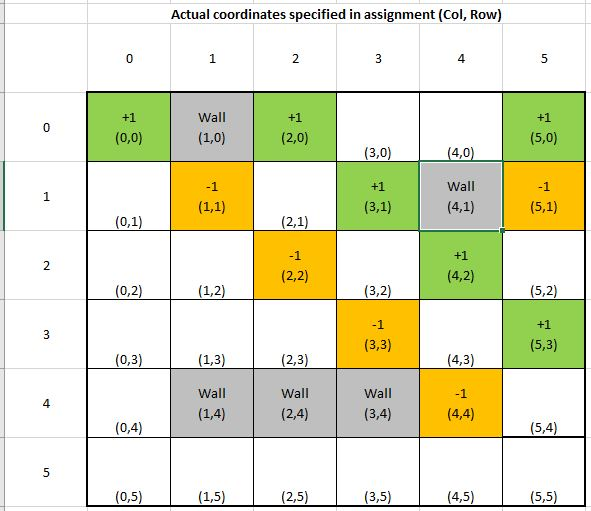

In [214]:
Image(filename = "coordinates_used_second_col,row.JPG", width = 600, height = 300)

In [156]:
iterations = int(len(hist)/36)
print(iterations)

hist_0_0 = []
hist_0_1 = []
hist_0_2 = []
hist_0_3 = [] 
hist_0_4 = [] 
hist_0_5 = [] 

hist_1_0 = []
hist_1_1 = [] 
hist_1_2 = []
hist_1_3 = [] 
hist_1_4 = [] 
hist_1_5 = [] 

hist_2_0 = []
hist_2_1 = []
hist_2_2 = []
hist_2_3 = []
hist_2_4 = []
hist_2_5 = []

hist_3_0 = []
hist_3_1 = []
hist_3_2 = []
hist_3_3 = []
hist_3_4 = []
hist_3_5 = []

hist_4_0 = []
hist_4_1 = []
hist_4_2 = []
hist_4_3 = []
hist_4_4 = []
hist_4_5 = []

hist_5_0 = []
hist_5_1 = []
hist_5_2 = []
hist_5_3 = []
hist_5_4 = []
hist_5_5 = []

#change coordinates
for i in range(iterations):
    hist_0_0.append(hist[0+i*36])
    hist_1_0.append(hist[1+i*36])
    hist_2_0.append(hist[2+i*36])
    hist_3_0.append(hist[3+i*36]) 
    hist_4_0.append(hist[4+i*36])
    hist_5_0.append(hist[5+i*36]) 

    hist_0_1.append(hist[6+i*36])
    hist_1_1.append(hist[7+i*36]) 
    hist_2_1.append(hist[8+i*36]) 
    hist_3_1.append(hist[9+i*36]) 
    hist_4_1.append(hist[10+i*36]) 
    hist_5_1.append(hist[11+i*36]) 
    
    hist_0_2.append(hist[12+i*36])
    hist_1_2.append(hist[13+i*36]) 
    hist_2_2.append(hist[14+i*36])
    hist_3_2.append(hist[15+i*36])
    hist_4_2.append(hist[16+i*36])
    hist_5_2.append(hist[17+i*36])
    
    hist_0_3.append(hist[18+i*36])
    hist_1_3.append(hist[19+i*36]) 
    hist_2_3.append(hist[20+i*36])
    hist_3_3.append(hist[21+i*36])
    hist_4_3.append(hist[22+i*36])
    hist_5_3.append(hist[23+i*36])
    
    hist_0_4.append(hist[24+i*36])
    hist_1_4.append(hist[25+i*36]) 
    hist_2_4.append(hist[26+i*36])
    hist_3_4.append(hist[27+i*36])
    hist_4_4.append(hist[28+i*36])
    hist_5_4.append(hist[29+i*36])
    
    hist_0_5.append(hist[30+i*36])
    hist_1_5.append(hist[31+i*36]) 
    hist_2_5.append(hist[32+i*36])
    hist_3_5.append(hist[33+i*36])
    hist_4_5.append(hist[34+i*36])
    hist_5_5.append(hist[35+i*36])

301


In [158]:
list_of_tuples = [str((i,j)) for i in range(6) for j in range (6)]
print(list_of_tuples)

['(0, 0)', '(0, 1)', '(0, 2)', '(0, 3)', '(0, 4)', '(0, 5)', '(1, 0)', '(1, 1)', '(1, 2)', '(1, 3)', '(1, 4)', '(1, 5)', '(2, 0)', '(2, 1)', '(2, 2)', '(2, 3)', '(2, 4)', '(2, 5)', '(3, 0)', '(3, 1)', '(3, 2)', '(3, 3)', '(3, 4)', '(3, 5)', '(4, 0)', '(4, 1)', '(4, 2)', '(4, 3)', '(4, 4)', '(4, 5)', '(5, 0)', '(5, 1)', '(5, 2)', '(5, 3)', '(5, 4)', '(5, 5)']


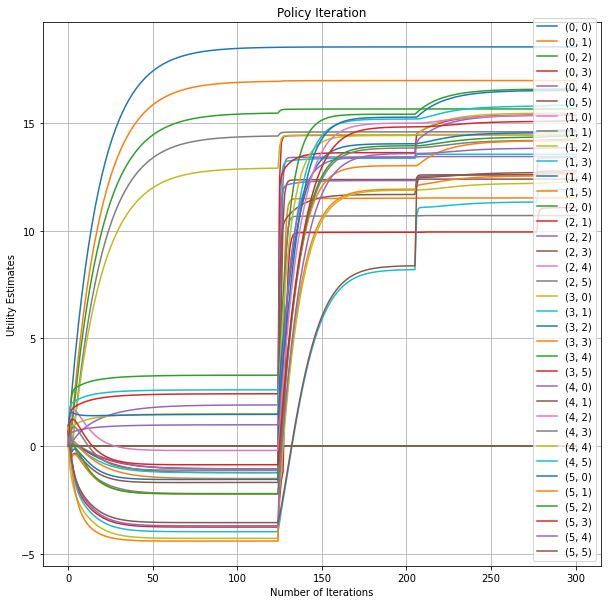

In [175]:
from matplotlib.pyplot import figure
x = [i for i in range(iterations)]

fig, ax = plt.subplots()
ax.plot(x, hist_0_0)
ax.plot(x, hist_0_1)
ax.plot(x, hist_0_2)
ax.plot(x, hist_0_3)
ax.plot(x, hist_0_4)
ax.plot(x, hist_0_5)

ax.plot(x, hist_1_0)
ax.plot(x, hist_1_1)
ax.plot(x, hist_1_2)
ax.plot(x, hist_1_3)
ax.plot(x, hist_1_4)
ax.plot(x, hist_1_5)

ax.plot(x, hist_2_0)
ax.plot(x, hist_2_1)
ax.plot(x, hist_2_2)
ax.plot(x, hist_2_3)
ax.plot(x, hist_2_4)
ax.plot(x, hist_2_5)

ax.plot(x, hist_3_0)
ax.plot(x, hist_3_1)
ax.plot(x, hist_3_2)
ax.plot(x, hist_3_3)
ax.plot(x, hist_3_4)
ax.plot(x, hist_3_5)

ax.plot(x, hist_4_0)
ax.plot(x, hist_4_1)
ax.plot(x, hist_4_2)
ax.plot(x, hist_4_3)
ax.plot(x, hist_4_4)
ax.plot(x, hist_4_5)

ax.plot(x, hist_5_0)
ax.plot(x, hist_5_1)
ax.plot(x, hist_5_2)
ax.plot(x, hist_5_3)
ax.plot(x, hist_5_4)
ax.plot(x, hist_5_5)

plt.legend(list_of_tuples, loc ="lower right")

plt.rcParams["figure.figsize"]=10,10

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates', title='Policy Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

# Printing column by column for a better view

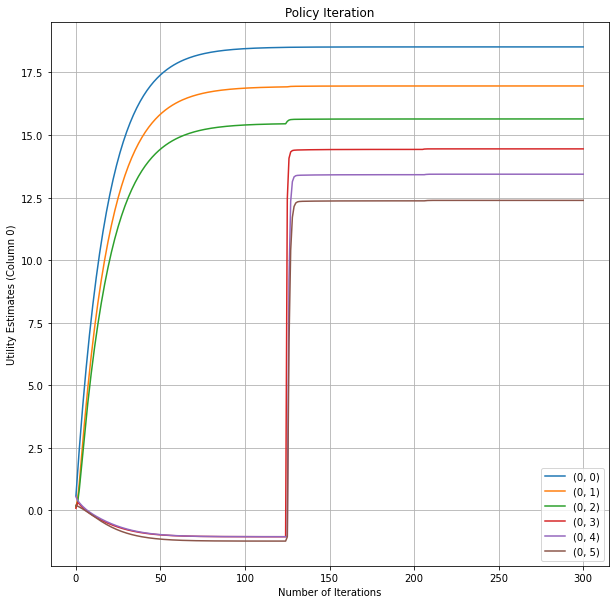

In [180]:
#Column 0

fig, ax = plt.subplots()
ax.plot(x, hist_0_0)
ax.plot(x, hist_0_1)
ax.plot(x, hist_0_2)
ax.plot(x, hist_0_3)
ax.plot(x, hist_0_4)
ax.plot(x, hist_0_5)

plt.legend(list_of_tuples, loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 0)', title='Policy Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

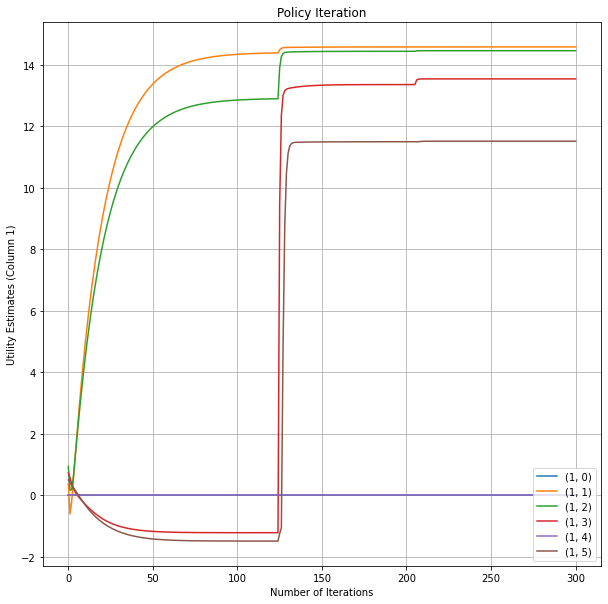

In [181]:
#Column 1

fig, ax = plt.subplots()
ax.plot(x, hist_1_0)
ax.plot(x, hist_1_1)
ax.plot(x, hist_1_2)
ax.plot(x, hist_1_3)
ax.plot(x, hist_1_4)
ax.plot(x, hist_1_5)

plt.legend(list_of_tuples[6:12], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 1)', title='Policy Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

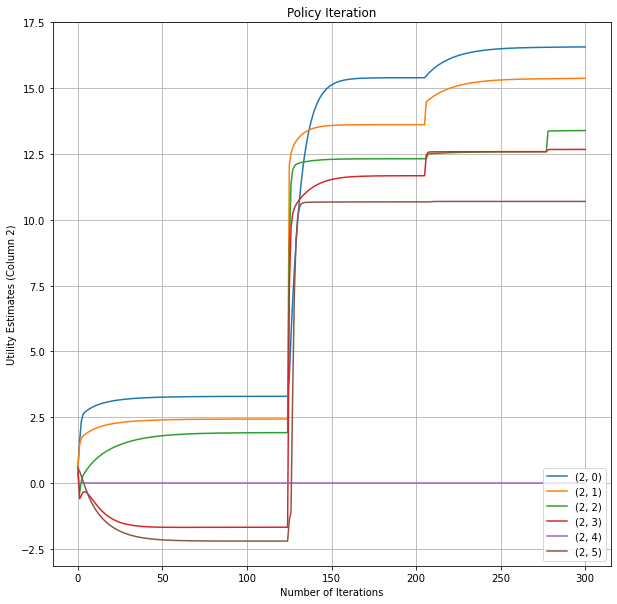

In [186]:
#Column 2

fig, ax = plt.subplots()
ax.plot(x, hist_2_0)
ax.plot(x, hist_2_1)
ax.plot(x, hist_2_2)
ax.plot(x, hist_2_3)
ax.plot(x, hist_2_4)
ax.plot(x, hist_2_5)

plt.legend(list_of_tuples[12:18], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 2)', title='Policy Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

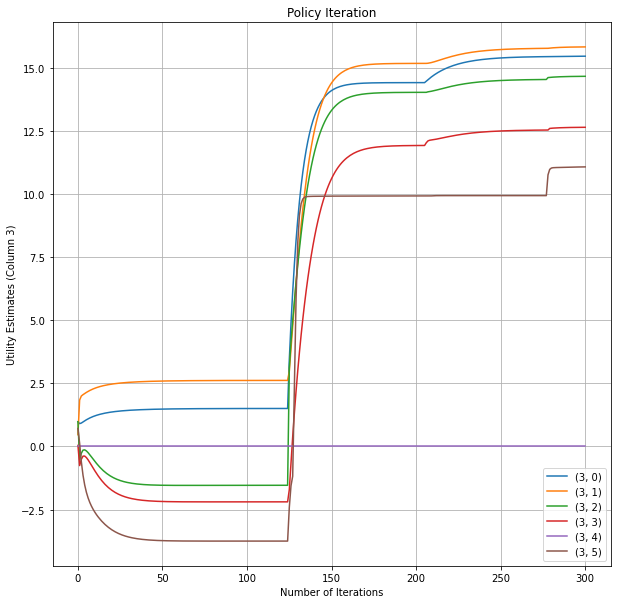

In [187]:
#Column 3

fig, ax = plt.subplots()
ax.plot(x, hist_3_0)
ax.plot(x, hist_3_1)
ax.plot(x, hist_3_2)
ax.plot(x, hist_3_3)
ax.plot(x, hist_3_4)
ax.plot(x, hist_3_5)

plt.legend(list_of_tuples[18:24], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 3)', title='Policy Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

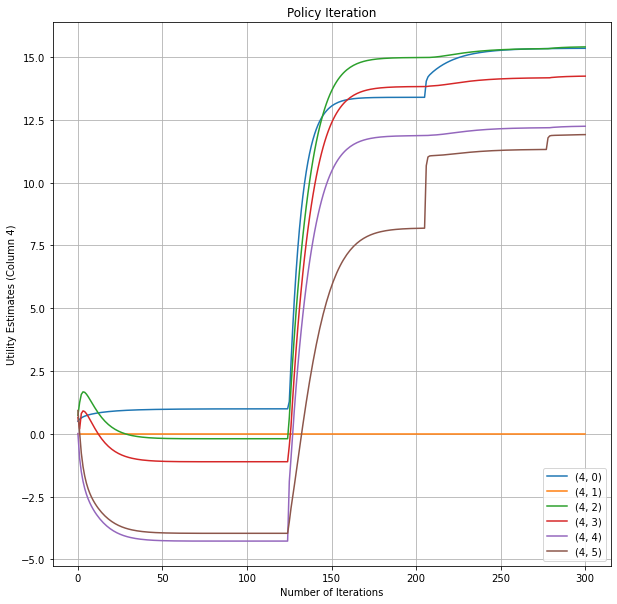

In [188]:
#Column 4

fig, ax = plt.subplots()
ax.plot(x, hist_4_0)
ax.plot(x, hist_4_1)
ax.plot(x, hist_4_2)
ax.plot(x, hist_4_3)
ax.plot(x, hist_4_4)
ax.plot(x, hist_4_5)

plt.legend(list_of_tuples[24:30], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 4)', title='Policy Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

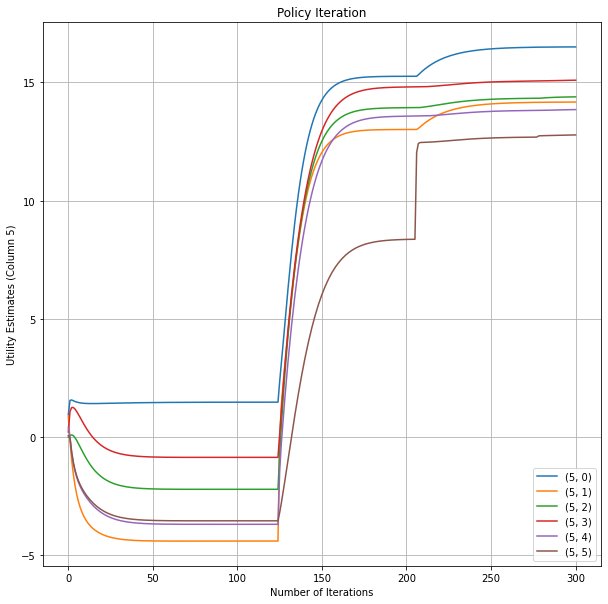

In [189]:
#Column 5

fig, ax = plt.subplots()
ax.plot(x, hist_5_0)
ax.plot(x, hist_5_1)
ax.plot(x, hist_5_2)
ax.plot(x, hist_5_3)
ax.plot(x, hist_5_4)
ax.plot(x, hist_5_5)

plt.legend(list_of_tuples[30:36], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 5)', title='Policy Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

In [194]:
#value iteration
import numpy as np
import matplotlib.pyplot as plt
#from grid_world import standard_grid, negative_grid
#from iterative_policy_evaluation import print_values, print_policy

SMALL_ENOUGH = 10e-4
GAMMA = 0.946
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

#this is deterministic
#all p(s', r|s, a) = 1 or 0

if __name__ == '__main__':
    #this grid gives you a reward of -0.1 for every non-terminal state
    #we want to see if this will encourage finding a shorter path to the goal
    grid = negative_grid()

    
    
    #print rewards
    print("rewards:")
    print_values(grid.rewards, grid)
    

    #state - > action
    #we will randomly choose an action and update as we learn
    policy = {}
    for s in grid.actions.keys():
        policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)
    
    #initial policy
    print("initial policy:")
    print_policy(policy, grid)
    
    hist = []
    
    #initialize V(s)
    V = {}
    states = grid.all_states()
    for s in states:
        #V[s] = 0
        if s in grid.actions:
            V[s] = 0
            #V[s] = np.random.random()
        else:
            #terminal state
            V[s] = 0
    #V[(0,3)] = 1   #MODI
    #V[(1,3)] = -1   #MODI
    
    #repeat until convergenece
    #V[s] = max[a]{ sum[s',r] { p(s', r|s, a)[r+gamme*V[s']]}}
    while True:
        biggest_change = 0
        for s in states: #states:11
            old_v = V[s]
            
            #V(s) only has value if it's not a terminal state
            if s in policy: #for those positions that can have policy (9 grids), iterate through
                new_v = float('-inf')
                for a in ALL_POSSIBLE_ACTIONS:
                    
                    grid.set_state(s)
                    #r = grid.move(a) #move only when legal / possible. Returns reward. 
                    r = grid.rewards.get(grid.current_state(), 0)
                    
                    
                    _ = grid.move(a)
                    v_correct = V[grid.current_state()]
                    
                    grid.set_state(s)
                    if a == 'U':
                        r_clockwise = grid.move('R')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('L')
                    elif a == 'R':
                        r_clockwise = grid.move('D')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('U')
                    elif a == 'D':
                        r_clockwise = grid.move('L')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('R')
                    elif a == 'L':
                        r_clockwise = grid.move('U')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('D')
                        
                    v_anticlockwise = V[grid.current_state()]
                        
                        
                    #v = r + GAMMA *V[grid.current_state()]) #current state is current position
                    v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
                    
                    if v > new_v:
                        new_v = v
                V[s] = new_v #update value if needed to
                biggest_change = max(biggest_change, np.abs(old_v - V[s]))
                
                
                print('Values:')
                print_values(V, grid)

                
        if biggest_change < SMALL_ENOUGH:
            break
            
            
    #find a policy that leads to optimal value function
    for s in policy.keys():
        best_a = None
        best_value = float('-inf')
        #loop through all possible actions to ind the best current action
        for a in ALL_POSSIBLE_ACTIONS:
            #grid.set_state(s)
            #r = grid.move(a)
            #v = r + GAMMA * V[grid.current_state()]
            
            grid.set_state(s)
            r = grid.rewards.get(grid.current_state(), 0)
                    
                    
            _ = grid.move(a)
            v_correct = V[grid.current_state()]
                    
            grid.set_state(s)
            if a == 'U':
                r_clockwise = grid.move('R')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('L')
            elif a == 'R':
                r_clockwise = grid.move('D')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('U')
            elif a == 'D':
                r_clockwise = grid.move('L')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('R')
            elif a == 'L':
                r_clockwise = grid.move('U')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('D')
                        
            v_anticlockwise = V[grid.current_state()] 
                        
            #v = r + GAMMA *V[grid.current_state()]) #current state is current position
            v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
            
            
            if v > best_value:
                best_value = v
                best_a = a
        policy[s] = best_a
        
    #our goal here is to verify that we get the same answer as with policy iteratation
    print('values:')
    print_values(V, grid)
    print('policy:')
    print_policy(policy, grid)

rewards:
--------------------------
 1.00000|  0.00000|  1.00000| -0.04000| -0.04000|  1.00000| 
--------------------------
-0.04000| -1.00000| -0.04000|  1.00000|  0.00000| -1.00000| 
--------------------------
-0.04000| -0.04000| -1.00000| -0.04000|  1.00000| -0.04000| 
--------------------------
-0.04000| -0.04000| -0.04000| -1.00000| -0.04000|  1.00000| 
--------------------------
-0.04000|  0.00000|  0.00000|  0.00000| -1.00000| -0.04000| 
--------------------------
-0.04000| -0.04000| -0.04000| -0.04000| -0.04000| -0.04000| 
initial policy:
--------------------------
    D   |         |     D   |     L   |     D   |     L   | 
--------------------------
    D   |     U   |     D   |     U   |         |     U   | 
--------------------------
    L   |     U   |     U   |     U   |     D   |     D   | 
--------------------------
    D   |     R   |     D   |     L   |     U   |     R   | 
--------------------------
    D   |         |         |         |     U   |     D   | 
-------

 0.67611| -0.39007|  1.56766|  1.90775|  0.00000|  0.40644| 
--------------------------
-0.04793| -0.12084| -0.32230|  0.71644|  1.89754|  0.80153| 
--------------------------
-0.08510| -0.08106| -0.13838| -0.40342|  0.71322|  0.99243| 
--------------------------
-0.07856|  0.00000|  0.00000|  0.00000| -1.00757|  0.61197| 
--------------------------
-0.08471| -0.07891| -0.04757| -0.08217| -0.07820| -0.04378| 
Values:
--------------------------
 1.00000|  0.00000|  1.93457|  0.87921|  1.54808|  1.91921| 
--------------------------
 0.67611| -0.39007|  1.56766|  1.90775|  0.00000|  0.40644| 
--------------------------
-0.04793| -0.12084| -0.32230|  0.71644|  1.89754|  0.80153| 
--------------------------
-0.08510| -0.08106| -0.14493| -0.40342|  0.71322|  0.99243| 
--------------------------
-0.07856|  0.00000|  0.00000|  0.00000| -1.00757|  0.61197| 
--------------------------
-0.08471| -0.07891| -0.04757| -0.08217| -0.07820| -0.04378| 
Values:
--------------------------
 1.00000|  0.000

 0.28519|  0.23969|  0.22096|  0.30677|  2.31809|  2.71408| 
--------------------------
 0.15398|  0.00000|  0.00000|  0.00000|  0.24985|  1.39920| 
--------------------------
-0.12305| -0.04224|  0.02613|  0.11019|  0.82061|  1.07857| 
Values:
--------------------------
 2.84092|  0.00000|  3.63302|  2.53363|  2.35715|  3.59027| 
--------------------------
 2.33124|  0.82889|  2.36106|  3.54521|  0.00000|  1.18115| 
--------------------------
 1.17467|  0.30630|  1.03664|  2.33420|  2.73826|  2.42837| 
--------------------------
 0.89864|  0.23969|  0.22096|  0.30677|  2.31809|  2.71408| 
--------------------------
 0.15398|  0.00000|  0.00000|  0.00000|  0.24985|  1.39920| 
--------------------------
-0.12305| -0.04224|  0.02613|  0.11019|  0.82061|  1.07857| 
Values:
--------------------------
 2.84092|  0.00000|  3.63302|  2.53363|  2.35715|  3.59027| 
--------------------------
 2.33124|  0.82889|  2.36106|  3.54521|  0.00000|  1.18115| 
--------------------------
 1.17467|  0.306

 2.65578|  1.64198|  2.42044|  3.77021|  4.25619|  3.85104| 
--------------------------
 1.58206|  1.49617|  1.52068|  1.69691|  3.74026|  4.21398| 
--------------------------
 1.28392|  0.00000|  0.00000|  0.00000|  1.67654|  2.89879| 
--------------------------
 0.49779|  0.72454|  0.94267|  1.19334|  2.12201|  2.46231| 
Values:
--------------------------
 4.48838|  0.00000|  5.12869|  4.00888|  3.84464|  5.06917| 
--------------------------
 3.86054|  2.20871|  3.84309|  4.97846|  0.00000|  2.66091| 
--------------------------
 2.65578|  1.64198|  2.42044|  3.77021|  4.25619|  3.85104| 
--------------------------
 1.58206|  1.49617|  1.52068|  1.69691|  3.74026|  4.21398| 
--------------------------
 1.28392|  0.00000|  0.00000|  0.00000|  1.67654|  2.89879| 
--------------------------
 0.49779|  0.72454|  0.94267|  1.19334|  2.12201|  2.46231| 
Values:
--------------------------
 4.48838|  0.00000|  5.12869|  4.00888|  3.84464|  5.06917| 
--------------------------
 3.86054|  2.208

 3.35240|  2.96859|  3.05976|  4.42419|  5.58384|  4.49432| 
--------------------------
 2.91286|  2.13389|  2.75817|  2.96702|  4.38536|  5.52702| 
--------------------------
 1.91411|  0.00000|  0.00000|  0.00000|  2.93844|  4.22159| 
--------------------------
 1.62384|  1.22799|  2.03287|  2.36541|  2.73047|  3.70689| 
Values:
--------------------------
 5.96272|  0.00000|  5.81039|  5.33373|  5.16283|  5.74384| 
--------------------------
 4.56501|  3.45519|  5.15954|  5.63005|  0.00000|  3.97882| 
--------------------------
 4.01277|  2.96859|  3.05976|  4.42419|  5.58384|  4.49432| 
--------------------------
 2.91286|  2.13389|  2.75817|  2.96702|  4.38536|  5.52702| 
--------------------------
 1.91411|  0.00000|  0.00000|  0.00000|  2.93844|  4.22159| 
--------------------------
 1.62384|  1.22799|  2.03287|  2.36541|  2.73047|  3.70689| 
Values:
--------------------------
 5.96272|  0.00000|  5.81039|  5.33373|  5.16283|  5.74384| 
--------------------------
 4.56501|  3.455

Values:
--------------------------
 7.28214|  0.00000|  7.05454|  6.50545|  6.33012|  6.97612| 
--------------------------
 5.86135|  4.56112|  6.32451|  6.81690|  0.00000|  5.14610| 
--------------------------
 5.22856|  4.16464|  4.22928|  5.61548|  6.74712|  5.65950| 
--------------------------
 4.11800|  3.32059|  3.86176|  4.08999|  5.55500|  6.67670| 
--------------------------
 3.11099|  0.00000|  0.00000|  0.00000|  4.04505|  5.38036| 
--------------------------
 2.73085|  2.21281|  3.02460|  3.41341|  3.83661|  4.79883| 
Values:
--------------------------
 7.28214|  0.00000|  7.05454|  6.50545|  6.33012|  6.97612| 
--------------------------
 5.86135|  4.56112|  6.32451|  6.81690|  0.00000|  5.14610| 
--------------------------
 5.22856|  4.16464|  4.22928|  6.15739|  6.74712|  5.65950| 
--------------------------
 4.11800|  3.32059|  3.86176|  4.08999|  5.55500|  6.67670| 
--------------------------
 3.11099|  0.00000|  0.00000|  0.00000|  4.04505|  5.38036| 
----------------

 7.02038|  5.54050|  7.35489|  7.86430|  0.00000|  6.17974| 
--------------------------
 5.78731|  5.23366|  5.26486|  6.66641|  7.76778|  6.68294| 
--------------------------
 5.19645|  4.38273|  4.83969|  5.08068|  6.58099|  7.68369| 
--------------------------
 4.18946|  0.00000|  0.00000|  0.00000|  5.01554|  6.39514| 
--------------------------
 3.73025|  3.09456|  3.89657|  4.33287|  4.80602|  5.75520| 
Values:
--------------------------
 8.46290|  0.00000|  8.15500|  7.54160|  7.36376|  8.06732| 
--------------------------
 7.02038|  5.54050|  7.35489|  7.86430|  0.00000|  6.17974| 
--------------------------
 6.31561|  5.23366|  5.26486|  6.66641|  7.76778|  6.68294| 
--------------------------
 5.19645|  4.38273|  4.83969|  5.08068|  6.58099|  7.68369| 
--------------------------
 4.18946|  0.00000|  0.00000|  0.00000|  5.01554|  6.39514| 
--------------------------
 3.73025|  3.09456|  3.89657|  4.33287|  4.80602|  5.75520| 
Values:
--------------------------
 8.46290|  0.000

Values:
--------------------------
 9.00590|  0.00000|  9.12834|  8.01382|  8.27904|  9.03357| 
--------------------------
 8.05658|  5.98726|  8.26616|  8.78897|  0.00000|  6.65129| 
--------------------------
 6.81509|  5.72451|  6.18151|  7.59386|  8.66542|  7.58842| 
--------------------------
 6.16042|  5.33081|  5.28588|  5.95492|  7.48248|  8.13985| 
--------------------------
 5.15414|  0.00000|  0.00000|  0.00000|  5.45544|  7.28476| 
--------------------------
 4.62294|  3.86874|  4.29122|  5.13846|  5.65534|  6.18805| 
Values:
--------------------------
 9.00590|  0.00000|  9.12834|  8.01382|  8.27904|  9.03357| 
--------------------------
 8.05658|  5.98726|  8.26616|  8.78897|  0.00000|  6.65129| 
--------------------------
 6.81509|  6.18835|  6.18151|  7.59386|  8.66542|  7.58842| 
--------------------------
 6.16042|  5.33081|  5.28588|  5.95492|  7.48248|  8.13985| 
--------------------------
 5.15414|  0.00000|  0.00000|  0.00000|  5.45544|  7.28476| 
----------------

 7.73384|  6.62668|  6.99288|  8.41270|  9.45561|  8.38554| 
--------------------------
 7.02198|  6.17689|  6.10098|  6.72678|  8.27583|  8.96773| 
--------------------------
 6.01639|  0.00000|  0.00000|  0.00000|  6.25489|  8.06577| 
--------------------------
 5.42131|  4.56690|  5.00671|  5.84516|  6.40054|  6.97336| 
Values:
--------------------------
 10.00553|  0.00000|  9.98921|  8.87545|  8.69660|  9.88918| 
--------------------------
 8.98296|  6.80321|  9.07210|  9.60553|  0.00000|  7.51259| 
--------------------------
 7.73384|  6.62668|  6.99288|  8.41270|  9.45561|  8.38554| 
--------------------------
 7.02198|  6.17689|  6.10098|  6.72678|  8.27583|  8.96773| 
--------------------------
 6.01639|  0.00000|  0.00000|  0.00000|  6.25489|  8.06577| 
--------------------------
 5.42131|  4.56690|  5.00671|  5.84516|  6.40054|  6.97336| 
Values:
--------------------------
 10.00553|  0.00000|  9.98921|  8.87545|  9.08953|  9.88918| 
--------------------------
 8.98296|  6.8

 7.79201|  6.93195|  6.82293|  7.40844|  8.97446|  9.69490| 
--------------------------
 6.78704|  0.00000|  0.00000|  0.00000|  6.95846|  8.75189| 
--------------------------
 6.14342|  5.27552|  5.63467|  6.46580|  7.05508|  7.66300| 
Values:
--------------------------
 10.90011|  0.00000|  10.75057|  9.63740|  9.45928|  10.64683| 
--------------------------
 9.81119|  7.52565|  9.43943|  10.32680|  0.00000|  8.27526| 
--------------------------
 8.55513|  7.43232|  7.71111|  9.13585|  10.15167|  9.08770| 
--------------------------
 7.79201|  6.93195|  6.82293|  7.40844|  8.97446|  9.69490| 
--------------------------
 6.78704|  0.00000|  0.00000|  0.00000|  6.95846|  8.75189| 
--------------------------
 6.14342|  5.27552|  5.63467|  6.46580|  7.05508|  7.66300| 
Values:
--------------------------
 10.90011|  0.00000|  10.75057|  9.63740|  9.45928|  10.64683| 
--------------------------
 9.81119|  7.52565|  9.78487|  10.32680|  0.00000|  8.27526| 
--------------------------
 8.5551

 8.14579|  7.60722|  7.46242|  7.71885|  9.59004|  10.33398| 
--------------------------
 7.47583|  0.00000|  0.00000|  0.00000|  7.57804|  9.06315| 
--------------------------
 6.47602|  5.92198|  6.18631|  6.74730|  7.63035|  8.26899| 
Values:
--------------------------
 11.70068|  0.00000|  11.42392|  10.31119|  10.13463|  11.31773| 
--------------------------
 10.55804|  8.23089|  10.11163|  10.96403|  0.00000|  8.95061| 
--------------------------
 9.29092|  8.15365|  8.34850|  9.77465|  10.46808|  9.70656| 
--------------------------
 8.14579|  7.60722|  7.46242|  7.71885|  9.59004|  10.33398| 
--------------------------
 7.47583|  0.00000|  0.00000|  0.00000|  7.57804|  9.06315| 
--------------------------
 6.47602|  5.92198|  6.18631|  6.74730|  7.63035|  8.26899| 
Values:
--------------------------
 11.70068|  0.00000|  11.42392|  10.31119|  10.13463|  11.31773| 
--------------------------
 10.55804|  8.23089|  10.11163|  10.96403|  0.00000|  8.95061| 
------------------------

 11.23031|  8.89605|  10.71345|  11.25428|  0.00000|  9.54864| 
--------------------------
 9.95635|  8.81002|  8.91949|  10.33958|  11.04416|  9.98798| 
--------------------------
 8.80146|  8.22002|  8.03359|  8.28511|  10.13275|  10.89597| 
--------------------------
 8.09544|  0.00000|  0.00000|  0.00000|  8.12394|  9.62873| 
--------------------------
 7.08873|  6.50149|  6.67122|  7.25875|  8.13626|  8.80181| 
Values:
--------------------------
 12.41713|  0.00000|  12.01942|  10.90702|  10.73265|  11.91181| 
--------------------------
 11.23031|  8.89605|  10.71345|  11.25428|  0.00000|  9.54864| 
--------------------------
 9.95635|  8.81002|  8.91949|  10.33958|  11.04416|  10.25228| 
--------------------------
 8.80146|  8.22002|  8.03359|  8.28511|  10.13275|  10.89597| 
--------------------------
 8.09544|  0.00000|  0.00000|  0.00000|  8.12394|  9.62873| 
--------------------------
 7.08873|  6.50149|  6.67122|  7.25875|  8.13626|  8.80181| 
Values:
-----------------------

 7.64166|  7.02398|  7.09771|  7.70862|  8.58143|  9.27055| 
Values:
--------------------------
 13.05828|  0.00000|  12.54606|  11.43393|  11.26220|  12.43787| 
--------------------------
 11.53961|  9.49321|  11.24703|  11.78374|  0.00000|  10.07819| 
--------------------------
 10.55352|  9.40221|  9.18065|  10.83928|  11.55238|  10.50054| 
--------------------------
 9.39297|  8.77239|  8.54359|  8.78662|  10.61159|  11.39045| 
--------------------------
 8.65456|  0.00000|  0.00000|  0.00000|  8.60528|  10.12632| 
--------------------------
 7.64166|  7.02398|  7.09771|  7.70862|  8.58143|  9.27055| 
Values:
--------------------------
 13.05828|  0.00000|  12.54606|  11.43393|  11.26220|  12.43787| 
--------------------------
 11.53961|  9.49321|  11.24703|  11.78374|  0.00000|  10.07819| 
--------------------------
 10.55352|  9.40221|  9.42660|  10.83928|  11.55238|  10.50054| 
--------------------------
 9.39297|  8.77239|  8.54359|  8.78662|  10.61159|  11.39045| 
------------

 13.35314|  0.00000|  12.78608|  11.67407|  11.73112|  12.67786| 
--------------------------
 12.10903|  9.76792|  11.71957|  12.25181|  0.00000|  10.54710| 
--------------------------
 10.82822|  9.93275|  9.65817|  11.06699|  12.00095|  10.95290| 
--------------------------
 9.92305|  9.02653|  8.99640|  9.23025|  10.82949|  11.82579| 
--------------------------
 8.91218|  0.00000|  0.00000|  0.00000|  8.82424|  10.56436| 
--------------------------
 8.13912|  7.26549|  7.47307|  8.10457|  8.78363|  9.48342| 
Values:
--------------------------
 13.35314|  0.00000|  12.78608|  11.67407|  11.73112|  12.67786| 
--------------------------
 12.10903|  9.76792|  11.71957|  12.25181|  0.00000|  10.54710| 
--------------------------
 10.82822|  9.93275|  9.65817|  11.06699|  12.00095|  10.95290| 
--------------------------
 9.92305|  9.02653|  8.99640|  9.23025|  10.82949|  11.82579| 
--------------------------
 8.91218|  0.00000|  0.00000|  0.00000|  9.02992|  10.56436| 
-------------------

 8.36815|  7.71094|  7.64357|  8.28444|  9.15149|  9.87064| 
Values:
--------------------------
 13.89594|  0.00000|  13.22407|  12.11226|  11.94504|  13.11621| 
--------------------------
 12.61862|  10.27364|  11.93516|  12.66565|  0.00000|  10.76103| 
--------------------------
 11.33395|  10.17675|  10.08149|  11.48248|  12.20513|  11.35227| 
--------------------------
 10.39746|  9.49418|  9.20327|  9.62260|  11.22659|  12.02360| 
--------------------------
 9.38657|  0.00000|  0.00000|  0.00000|  9.22314|  10.95018| 
--------------------------
 8.36815|  7.71094|  7.64357|  8.28444|  9.15149|  9.87064| 
Values:
--------------------------
 13.89594|  0.00000|  13.22407|  12.11226|  11.94504|  13.11621| 
--------------------------
 12.61862|  10.27364|  11.93516|  12.66565|  0.00000|  10.76103| 
--------------------------
 11.33395|  10.17675|  10.08149|  11.48248|  12.20513|  11.35227| 
--------------------------
 10.39746|  9.49418|  9.20327|  9.62260|  11.22659|  12.02360| 
----

 9.81129|  0.00000|  0.00000|  0.00000|  9.57524|  11.12555| 
--------------------------
 8.78984|  8.10984|  7.95380|  8.61173|  9.47563|  10.21177| 
Values:
--------------------------
 14.38170|  0.00000|  13.61140|  12.49976|  12.33578|  13.50436| 
--------------------------
 13.07466|  10.72624|  12.32894|  12.85423|  0.00000|  11.15176| 
--------------------------
 11.78655|  10.62614|  10.45677|  11.84989|  12.57734|  11.53409| 
--------------------------
 10.61585|  9.91801|  9.58187|  9.80144|  11.57723|  12.38358| 
--------------------------
 9.81129|  0.00000|  0.00000|  0.00000|  9.57524|  11.12555| 
--------------------------
 8.78984|  8.10984|  7.95380|  8.61173|  9.47563|  10.21177| 
Values:
--------------------------
 14.38170|  0.00000|  13.61140|  12.49976|  12.33578|  13.50436| 
--------------------------
 13.07466|  10.72624|  12.32894|  12.85423|  0.00000|  11.15176| 
--------------------------
 11.78655|  10.62614|  10.45677|  11.84989|  12.57734|  11.70497| 
----

 10.19183|  0.00000|  0.00000|  0.00000|  9.88613|  11.44478| 
--------------------------
 9.16759|  8.46714|  8.22719|  8.90017|  9.76138|  10.51245| 
Values:
--------------------------
 14.81641|  0.00000|  13.95394|  12.84245|  12.68177|  13.68144| 
--------------------------
 13.28439|  11.13134|  12.67766|  13.19831|  0.00000|  11.49775| 
--------------------------
 12.19164|  11.02874|  10.62815|  12.17482|  12.90612|  11.86558| 
--------------------------
 11.01816|  10.29860|  9.91822|  10.12786|  11.88695|  12.70091| 
--------------------------
 10.19183|  0.00000|  0.00000|  0.00000|  9.88613|  11.44478| 
--------------------------
 9.16759|  8.46714|  8.22719|  8.90017|  9.76138|  10.51245| 
Values:
--------------------------
 14.81641|  0.00000|  13.95394|  12.84245|  12.68177|  13.84807| 
--------------------------
 13.28439|  11.13134|  12.67766|  13.19831|  0.00000|  11.49775| 
--------------------------
 12.19164|  11.02874|  10.62815|  12.17482|  12.90612|  11.86558| 


 11.37825|  10.47366|  10.21671|  10.41664|  12.02800|  12.98076| 
--------------------------
 10.36688|  0.00000|  0.00000|  0.00000|  10.16072|  11.72629| 
--------------------------
 9.50590|  8.63157|  8.46823|  9.15450|  9.89134|  10.77759| 
Values:
--------------------------
 15.20544|  0.00000|  14.11005|  13.14550|  12.98815|  14.00488| 
--------------------------
 13.67047|  11.49387|  12.98648|  13.50257|  0.00000|  11.80413| 
--------------------------
 12.55417|  11.38908|  10.94144|  12.46220|  13.19661|  12.15845| 
--------------------------
 11.37825|  10.47366|  10.21671|  10.41664|  12.02800|  12.98076| 
--------------------------
 10.53248|  0.00000|  0.00000|  0.00000|  10.16072|  11.72629| 
--------------------------
 9.50590|  8.63157|  8.46823|  9.15450|  9.89134|  10.77759| 
Values:
--------------------------
 15.20544|  0.00000|  14.11005|  13.14550|  12.98815|  14.00488| 
--------------------------
 13.67047|  11.49387|  12.98648|  13.50257|  0.00000|  11.80413

 15.38435|  0.00000|  14.39493|  13.28362|  13.25944|  14.29128| 
--------------------------
 14.01599|  11.66059|  13.25997|  13.77163|  0.00000|  12.07543| 
--------------------------
 12.72089|  11.71156|  11.21920|  12.59319|  13.45332|  12.41725| 
--------------------------
 11.70052|  10.79595|  10.48157|  10.67211|  12.28522|  13.22766| 
--------------------------
 10.68914|  0.00000|  0.00000|  0.00000|  10.40329|  11.97464| 
--------------------------
 9.80871|  8.93435|  8.68083|  9.37883|  10.12806|  11.01149| 
Values:
--------------------------
 15.55359|  0.00000|  14.39493|  13.28362|  13.25944|  14.29128| 
--------------------------
 14.01599|  11.66059|  13.25997|  13.77163|  0.00000|  12.07543| 
--------------------------
 12.72089|  11.71156|  11.21920|  12.59319|  13.45332|  12.41725| 
--------------------------
 11.70052|  10.79595|  10.48157|  10.67211|  12.28522|  13.22766| 
--------------------------
 10.68914|  0.00000|  0.00000|  0.00000|  10.40329|  11.97464| 

 10.07970|  9.20535|  8.77756|  9.57679|  10.33695|  11.11792| 
Values:
--------------------------
 15.71370|  0.00000|  14.64685|  13.53565|  13.49968|  14.54489| 
--------------------------
 14.32520|  11.96751|  13.50217|  14.00958|  0.00000|  12.31566| 
--------------------------
 13.02781|  12.00016|  11.46545|  12.83226|  13.68022|  12.64599| 
--------------------------
 11.98892|  11.08437|  10.71660|  10.89814|  12.51254|  13.44556| 
--------------------------
 10.97754|  0.00000|  0.00000|  0.00000|  10.51377|  12.19381| 
--------------------------
 10.07970|  9.20535|  8.77756|  9.57679|  10.33695|  11.11792| 
Values:
--------------------------
 15.71370|  0.00000|  14.64685|  13.53565|  13.49968|  14.54489| 
--------------------------
 14.32520|  11.96751|  13.50217|  14.00958|  0.00000|  12.31566| 
--------------------------
 13.02781|  12.00016|  11.46545|  12.83226|  13.68022|  12.64599| 
--------------------------
 11.98892|  11.08437|  10.71660|  10.89814|  12.51254|  1

--------------------------
 12.24701|  11.34249|  10.92517|  11.09813|  12.71347|  13.63794| 
--------------------------
 11.23563|  0.00000|  0.00000|  0.00000|  10.71527|  12.38730| 
--------------------------
 10.32222|  9.44786|  8.95380|  9.75153|  10.52134|  11.31185| 
Values:
--------------------------
 16.00844|  0.00000|  14.86964|  13.75853|  13.71240|  14.76946| 
--------------------------
 14.60191|  12.24217|  13.71667|  14.22002|  0.00000|  12.52839| 
--------------------------
 13.30248|  12.25842|  11.68378|  13.04372|  13.88080|  12.84819| 
--------------------------
 12.24701|  11.34249|  10.92517|  11.09813|  12.71347|  13.63794| 
--------------------------
 11.23563|  0.00000|  0.00000|  0.00000|  10.71527|  12.38730| 
--------------------------
 10.32222|  9.44786|  9.03401|  9.75153|  10.52134|  11.31185| 
Values:
--------------------------
 16.00844|  0.00000|  14.86964|  13.75853|  13.71240|  14.76946| 
--------------------------
 14.60191|  12.24217|  13.71667|

 14.84955|  12.48798|  13.90664|  14.40613|  0.00000|  12.62544| 
--------------------------
 13.54828|  12.37719|  11.87735|  13.23078|  14.05814|  13.02696| 
--------------------------
 12.47798|  11.57347|  11.02047|  11.27509|  12.89111|  13.72552| 
--------------------------
 11.46660|  0.00000|  0.00000|  0.00000|  10.89336|  12.55815| 
--------------------------
 10.53926|  9.66490|  9.10939|  9.90581|  10.68416|  11.48308| 
Values:
--------------------------
 16.27221|  0.00000|  15.06667|  13.95564|  13.90077|  14.96832| 
--------------------------
 14.84955|  12.48798|  13.90664|  14.40613|  0.00000|  12.62544| 
--------------------------
 13.54828|  12.37719|  11.87735|  13.23078|  14.05814|  13.02696| 
--------------------------
 12.47798|  11.57347|  11.02047|  11.27509|  12.89111|  13.72552| 
--------------------------
 11.46660|  0.00000|  0.00000|  0.00000|  10.89336|  12.55815| 
--------------------------
 10.53926|  9.66490|  9.10939|  9.90581|  10.68416|  11.48308| 


 16.50826|  0.00000|  15.24091|  14.12996|  13.98671|  15.14441| 
--------------------------
 15.07116|  12.70795|  13.99331|  14.57074|  0.00000|  12.80269| 
--------------------------
 13.76825|  12.59584|  12.04899|  13.39627|  14.13896|  13.18504| 
--------------------------
 12.68469|  11.78019|  11.19484|  11.43168|  13.04816|  13.88518| 
--------------------------
 11.67330|  0.00000|  0.00000|  0.00000|  11.05079|  12.70907| 
--------------------------
 10.73348|  9.85913|  9.24678|  10.04208|  10.82797|  11.63430| 
Values:
--------------------------
 16.50826|  0.00000|  15.24091|  14.12996|  13.98671|  15.14441| 
--------------------------
 15.07116|  12.70795|  13.99331|  14.57074|  0.00000|  12.80269| 
--------------------------
 13.76825|  12.59584|  12.04899|  13.39627|  14.21496|  13.18504| 
--------------------------
 12.68469|  11.78019|  11.19484|  11.43168|  13.04816|  13.88518| 
--------------------------
 11.67330|  0.00000|  0.00000|  0.00000|  11.05079|  12.70907

 13.96511|  12.79151|  12.12737|  13.54266|  14.28642|  13.25708| 
--------------------------
 12.77974|  11.96518|  11.34959|  11.50308|  13.18704|  14.02623| 
--------------------------
 11.85828|  0.00000|  0.00000|  0.00000|  11.18998|  12.77780| 
--------------------------
 10.82280|  10.03294|  9.36814|  10.10414|  10.95502|  11.76788| 
Values:
--------------------------
 16.71951|  0.00000|  15.39499|  14.28411|  14.14367|  15.30034| 
--------------------------
 15.17308|  12.90481|  14.15165|  14.64577|  0.00000|  12.95966| 
--------------------------
 13.96511|  12.79151|  12.12737|  13.54266|  14.28642|  13.25708| 
--------------------------
 12.77974|  11.96518|  11.34959|  11.50308|  13.18704|  14.02623| 
--------------------------
 11.85828|  0.00000|  0.00000|  0.00000|  11.18998|  12.77780| 
--------------------------
 10.82280|  10.03294|  9.36814|  10.10414|  10.95502|  11.76788| 
Values:
--------------------------
 16.71951|  0.00000|  15.39499|  14.28411|  14.14367| 

 12.95473|  12.13074|  11.48693|  11.63344|  13.30985|  14.15086| 
--------------------------
 12.02382|  0.00000|  0.00000|  0.00000|  11.31306|  12.90313| 
--------------------------
 10.98724|  10.18850|  9.47536|  10.21729|  11.06729|  11.88591| 
Values:
--------------------------
 16.90855|  0.00000|  15.53126|  14.42045|  14.28266|  15.37147| 
--------------------------
 15.36070|  13.08098|  14.29188|  14.78269|  0.00000|  13.09865| 
--------------------------
 14.14128|  12.96662|  12.27068|  13.67218|  14.41683|  13.38854| 
--------------------------
 12.95473|  12.13074|  11.48693|  11.63344|  13.30985|  14.15086| 
--------------------------
 12.02382|  0.00000|  0.00000|  0.00000|  11.31306|  12.90313| 
--------------------------
 10.98724|  10.18850|  9.47536|  10.21729|  11.06729|  11.88591| 
Values:
--------------------------
 16.90855|  0.00000|  15.53126|  14.42045|  14.28266|  15.43841| 
--------------------------
 15.36070|  13.08098|  14.29188|  14.78269|  0.00000|  

 13.11133|  12.20687|  11.60883|  11.74880|  13.36583|  14.26101| 
--------------------------
 12.09995|  0.00000|  0.00000|  0.00000|  11.42190|  13.01389| 
--------------------------
 11.13439|  10.26003|  9.57010|  10.31729|  11.11843|  11.93967| 
Values:
--------------------------
 16.99549|  0.00000|  15.59337|  14.48258|  14.40574|  15.50140| 
--------------------------
 15.52860|  13.16199|  14.41609|  14.90380|  0.00000|  13.22172| 
--------------------------
 14.22230|  13.12333|  12.39776|  13.73123|  14.53217|  13.50481| 
--------------------------
 13.11133|  12.20687|  11.60883|  11.74880|  13.36583|  14.26101| 
--------------------------
 12.09995|  0.00000|  0.00000|  0.00000|  11.42190|  13.01389| 
--------------------------
 11.13439|  10.26003|  9.57010|  10.31729|  11.11843|  11.99021| 
Values:
--------------------------
 17.07774|  0.00000|  15.59337|  14.48258|  14.40574|  15.50140| 
--------------------------
 15.52860|  13.16199|  14.41609|  14.90380|  0.00000|  

 17.15554|  0.00000|  15.70670|  14.59597|  14.51472|  15.61646| 
--------------------------
 15.67885|  13.31114|  14.52610|  15.01092|  0.00000|  13.27787| 
--------------------------
 14.37144|  13.26357|  12.51044|  13.83901|  14.63419|  13.60766| 
--------------------------
 13.25148|  12.34703|  11.66454|  11.85090|  13.46799|  14.31119| 
--------------------------
 12.24010|  0.00000|  0.00000|  0.00000|  11.47150|  13.11180| 
--------------------------
 11.26608|  10.39172|  9.61326|  10.40567|  11.21171|  12.03773| 
Values:
--------------------------
 17.15554|  0.00000|  15.70670|  14.59597|  14.51472|  15.61646| 
--------------------------
 15.67885|  13.31114|  14.52610|  15.01092|  0.00000|  13.33071| 
--------------------------
 14.37144|  13.26357|  12.51044|  13.83901|  14.63419|  13.60766| 
--------------------------
 13.25148|  12.34703|  11.66454|  11.85090|  13.46799|  14.31119| 
--------------------------
 12.24010|  0.00000|  0.00000|  0.00000|  11.47150|  13.1118

 11.32664|  10.50957|  9.69679|  10.44594|  11.29417|  12.12441| 
Values:
--------------------------
 17.29877|  0.00000|  15.80693|  14.69624|  14.56444|  15.71833| 
--------------------------
 15.81332|  13.44461|  14.57630|  15.10568|  0.00000|  13.38043| 
--------------------------
 14.50491|  13.32806|  12.61037|  13.93437|  14.68069|  13.69864| 
--------------------------
 13.37690|  12.47246|  11.76647|  11.94126|  13.55835|  14.40273| 
--------------------------
 12.36552|  0.00000|  0.00000|  0.00000|  11.56203|  13.19835| 
--------------------------
 11.32664|  10.50957|  9.69679|  10.44594|  11.29417|  12.12441| 
Values:
--------------------------
 17.29877|  0.00000|  15.80693|  14.69624|  14.56444|  15.71833| 
--------------------------
 15.81332|  13.44461|  14.57630|  15.10568|  0.00000|  13.38043| 
--------------------------
 14.50491|  13.32806|  12.61037|  13.93437|  14.68069|  13.69864| 
--------------------------
 13.37690|  12.47246|  11.76647|  11.94126|  13.55835

 14.62436|  13.44679|  12.69898|  14.01874|  14.76557|  13.77912| 
--------------------------
 13.43458|  12.58470|  11.85696|  11.98247|  13.63828|  14.48366| 
--------------------------
 12.47776|  0.00000|  0.00000|  0.00000|  11.64210|  13.23779| 
--------------------------
 11.43812|  10.61504|  9.79903|  10.51940|  11.36708|  12.20105| 
Values:
--------------------------
 17.42694|  0.00000|  15.89556|  14.78492|  14.65525|  15.80855| 
--------------------------
 15.93366|  13.56405|  14.66800|  15.18949|  0.00000|  13.47124| 
--------------------------
 14.62436|  13.44679|  12.69898|  14.01874|  14.76557|  13.77912| 
--------------------------
 13.43458|  12.58470|  11.85696|  11.98247|  13.63828|  14.48366| 
--------------------------
 12.47776|  0.00000|  0.00000|  0.00000|  11.64210|  13.23779| 
--------------------------
 11.43812|  10.61504|  9.79903|  10.51940|  11.36708|  12.20105| 
Values:
--------------------------
 17.42694|  0.00000|  15.89556|  14.78492|  14.65525| 

 16.04135|  13.67095|  14.74923|  15.26363|  0.00000|  13.55165| 
--------------------------
 14.73125|  13.55304|  12.77757|  14.09340|  14.84065|  13.85032| 
--------------------------
 13.58958|  12.68516|  11.93727|  12.05771|  13.70899|  14.55522| 
--------------------------
 12.57820|  0.00000|  0.00000|  0.00000|  11.71292|  13.30974| 
--------------------------
 11.53790|  10.70942|  9.89330|  10.58435|  11.43154|  12.26880| 
Values:
--------------------------
 17.54165|  0.00000|  15.97395|  14.86335|  14.73567|  15.88843| 
--------------------------
 16.04135|  13.67095|  14.74923|  15.26363|  0.00000|  13.55165| 
--------------------------
 14.73125|  13.55304|  12.77757|  14.09340|  14.84065|  13.85032| 
--------------------------
 13.58958|  12.68516|  11.93727|  12.05771|  13.70899|  14.55522| 
--------------------------
 12.57820|  0.00000|  0.00000|  0.00000|  11.71292|  13.34254| 
--------------------------
 11.53790|  10.70942|  9.89330|  10.58435|  11.43154|  12.2688

 13.63578|  12.77505|  12.00857|  12.12430|  13.77154|  14.61851| 
--------------------------
 12.66809|  0.00000|  0.00000|  0.00000|  11.77558|  13.37337| 
--------------------------
 11.62718|  10.79389|  9.97776|  10.64178|  11.48855|  12.32872| 
Values:
--------------------------
 17.64430|  0.00000|  16.04327|  14.93271|  14.80688|  15.95917| 
--------------------------
 16.09088|  13.76661|  14.82118|  15.29742|  0.00000|  13.62286| 
--------------------------
 14.82691|  13.64812|  12.84726|  14.15945|  14.90708|  13.88278| 
--------------------------
 13.63578|  12.77505|  12.00857|  12.12430|  13.77154|  14.61851| 
--------------------------
 12.66809|  0.00000|  0.00000|  0.00000|  11.77558|  13.37337| 
--------------------------
 11.62718|  10.79389|  9.97776|  10.64178|  11.48855|  12.32872| 
Values:
--------------------------
 17.64430|  0.00000|  16.04327|  14.93271|  14.80688|  15.95917| 
--------------------------
 16.13773|  13.76661|  14.82118|  15.29742|  0.00000|  

 13.72081|  12.81639|  12.07187|  12.18325|  13.80006|  14.67447| 
--------------------------
 12.70943|  0.00000|  0.00000|  0.00000|  11.83100|  13.42965| 
--------------------------
 11.70709|  10.83273|  10.05335|  10.69258|  11.51453|  12.38171| 
Values:
--------------------------
 17.73617|  0.00000|  16.07486|  14.99405|  14.86993|  15.99144| 
--------------------------
 16.18205|  13.85222|  14.88491|  15.35910|  0.00000|  13.68591| 
--------------------------
 14.91252|  13.73322|  12.87910|  14.21790|  14.96584|  13.94203| 
--------------------------
 13.72081|  12.81639|  12.07187|  12.18325|  13.80006|  14.67447| 
--------------------------
 12.74853|  0.00000|  0.00000|  0.00000|  11.83100|  13.42965| 
--------------------------
 11.70709|  10.83273|  10.05335|  10.69258|  11.51453|  12.38171| 
Values:
--------------------------
 17.73617|  0.00000|  16.07486|  14.99405|  14.86993|  15.99144| 
--------------------------
 16.18205|  13.85222|  14.88491|  15.35910|  0.00000|

 12.78553|  0.00000|  0.00000|  0.00000|  11.88004|  13.47942| 
--------------------------
 11.77859|  10.90424|  10.12100|  10.73750|  11.56195|  12.42858| 
Values:
--------------------------
 17.81838|  0.00000|  16.13252|  15.04831|  14.92576|  16.05038| 
--------------------------
 16.26364|  13.92883|  14.94137|  15.41367|  0.00000|  13.74175| 
--------------------------
 14.98914|  13.80937|  12.93731|  14.26962|  15.01783|  13.99445| 
--------------------------
 13.79691|  12.89250|  12.12806|  12.23542|  13.85212|  14.72398| 
--------------------------
 12.78553|  0.00000|  0.00000|  0.00000|  11.88004|  13.47942| 
--------------------------
 11.77859|  10.90424|  10.12100|  10.73750|  11.56195|  12.42858| 
Values:
--------------------------
 17.81838|  0.00000|  16.13252|  15.04831|  14.92576|  16.05038| 
--------------------------
 16.26364|  13.92883|  14.94137|  15.41367|  0.00000|  13.74175| 
--------------------------
 14.98914|  13.80937|  12.93731|  14.26962|  15.01783|

--------------------------
 16.33665|  13.96406|  14.99138|  15.46193|  0.00000|  13.79119| 
--------------------------
 15.02437|  13.87752|  12.98894|  14.29320|  15.06384|  14.04084| 
--------------------------
 13.86501|  12.96061|  12.17794|  12.28161|  13.89818|  14.74654| 
--------------------------
 12.85363|  0.00000|  0.00000|  0.00000|  11.90240|  13.52345| 
--------------------------
 11.84259|  10.96823|  10.15211|  10.77723|  11.60389|  12.44995| 
Values:
--------------------------
 17.85619|  0.00000|  16.18351|  15.07303|  14.97520|  16.10258| 
--------------------------
 16.33665|  13.96406|  14.99138|  15.46193|  0.00000|  13.79119| 
--------------------------
 15.02437|  13.87752|  12.98894|  14.29320|  15.06384|  14.04084| 
--------------------------
 13.86501|  12.96061|  12.17794|  12.28161|  13.89818|  14.76776| 
--------------------------
 12.85363|  0.00000|  0.00000|  0.00000|  11.90240|  13.52345| 
--------------------------
 11.84259|  10.96823|  10.15211|  

 13.92596|  13.02156|  12.20075|  12.32249|  13.93894|  14.78773| 
--------------------------
 12.91458|  0.00000|  0.00000|  0.00000|  11.94321|  13.56240| 
--------------------------
 11.89986|  11.02550|  10.20938|  10.81238|  11.64099|  12.48894| 
Values:
--------------------------
 17.92579|  0.00000|  16.22860|  15.11816|  15.01898|  16.14880| 
--------------------------
 16.40200|  14.02892|  15.03568|  15.50463|  0.00000|  13.81374| 
--------------------------
 15.08923|  13.90886|  13.03473|  14.33625|  15.10454|  14.08188| 
--------------------------
 13.92596|  13.02156|  12.20075|  12.32249|  13.93894|  14.78773| 
--------------------------
 12.91458|  0.00000|  0.00000|  0.00000|  11.94321|  13.56240| 
--------------------------
 11.89986|  11.02550|  10.20938|  10.81238|  11.64099|  12.48894| 
Values:
--------------------------
 17.92579|  0.00000|  16.22860|  15.11816|  15.01898|  16.14880| 
--------------------------
 16.40200|  14.02892|  15.03568|  15.50463|  0.00000|

--------------------------
 16.46047|  14.08697|  15.07493|  15.54240|  0.00000|  13.85494| 
--------------------------
 15.14727|  13.96655|  13.07535|  14.37434|  15.14056|  14.11820| 
--------------------------
 13.98050|  13.07610|  12.24248|  12.35868|  13.97500|  14.82416| 
--------------------------
 12.96912|  0.00000|  0.00000|  0.00000|  11.97932|  13.59685| 
--------------------------
 11.95111|  11.07675|  10.26063|  10.84348|  11.67381|  12.52343| 
Values:
--------------------------
 17.98808|  0.00000|  16.26848|  15.15806|  15.05775|  16.18972| 
--------------------------
 16.46047|  14.08697|  15.07493|  15.54240|  0.00000|  13.85494| 
--------------------------
 15.14727|  13.96655|  13.07535|  14.37434|  15.14056|  14.11820| 
--------------------------
 13.98050|  13.07610|  12.24248|  12.35868|  13.97500|  14.82416| 
--------------------------
 12.96912|  0.00000|  0.00000|  0.00000|  11.97932|  13.59685| 
--------------------------
 11.95111|  11.07675|  10.26063|  

 15.19922|  14.01818|  13.11138|  14.40805|  15.17242|  14.15034| 
--------------------------
 14.02931|  13.12492|  12.27953|  12.39071|  14.00691|  14.85639| 
--------------------------
 13.01793|  0.00000|  0.00000|  0.00000|  12.01127|  13.62733| 
--------------------------
 11.99697|  11.12262|  10.30649|  10.87098|  11.70285|  12.55394| 
Values:
--------------------------
 18.04382|  0.00000|  16.30375|  15.19336|  15.07544|  16.22596| 
--------------------------
 16.51281|  14.13891|  15.10969|  15.57581|  0.00000|  13.89142| 
--------------------------
 15.19922|  14.01818|  13.11138|  14.40805|  15.17242|  14.15034| 
--------------------------
 14.02931|  13.12492|  12.27953|  12.39071|  14.00691|  14.85639| 
--------------------------
 13.01793|  0.00000|  0.00000|  0.00000|  12.01127|  13.62733| 
--------------------------
 11.99697|  11.12262|  10.30649|  10.87098|  11.70285|  12.55394| 
Values:
--------------------------
 18.04382|  0.00000|  16.30375|  15.19336|  15.09208

 12.01806|  11.16366|  10.34754|  10.88352|  11.72854|  12.58094| 
Values:
--------------------------
 18.09370|  0.00000|  16.33495|  15.22457|  15.10774|  16.25805| 
--------------------------
 16.55964|  14.18540|  15.12556|  15.59104|  0.00000|  13.92373| 
--------------------------
 15.24570|  14.06439|  13.14334|  14.43788|  15.18696|  14.17878| 
--------------------------
 14.05176|  13.16860|  12.31507|  12.40532|  14.03514|  14.88490| 
--------------------------
 13.06161|  0.00000|  0.00000|  0.00000|  12.03954|  13.64123| 
--------------------------
 12.01806|  11.16366|  10.34754|  10.88352|  11.72854|  12.58094| 
Values:
--------------------------
 18.09370|  0.00000|  16.33495|  15.22457|  15.10774|  16.25805| 
--------------------------
 16.55964|  14.18540|  15.12556|  15.60537|  0.00000|  13.92373| 
--------------------------
 15.24570|  14.06439|  13.14334|  14.43788|  15.18696|  14.17878| 
--------------------------
 14.05176|  13.16860|  12.31507|  12.40532|  14.035

 14.09308|  13.20770|  12.35277|  12.43266|  14.06019|  14.91013| 
--------------------------
 13.10070|  0.00000|  0.00000|  0.00000|  12.06458|  13.66659| 
--------------------------
 12.05689|  11.20039|  10.38427|  10.90642|  11.75127|  12.60482| 
Values:
--------------------------
 18.13834|  0.00000|  16.36254|  15.25218|  15.13635|  16.27269| 
--------------------------
 16.58118|  14.22700|  15.15455|  15.61884|  0.00000|  13.95233| 
--------------------------
 15.28730|  14.10574|  13.15794|  14.46428|  15.21348|  14.19175| 
--------------------------
 14.09308|  13.20770|  12.35277|  12.43266|  14.06019|  14.91013| 
--------------------------
 13.10070|  0.00000|  0.00000|  0.00000|  12.06458|  13.66659| 
--------------------------
 12.05689|  11.20039|  10.38427|  10.90642|  11.75127|  12.60482| 
Values:
--------------------------
 18.13834|  0.00000|  16.36254|  15.25218|  15.13635|  16.28647| 
--------------------------
 16.58118|  14.22700|  15.15455|  15.61884|  0.00000|

--------------------------
 14.13006|  13.22567|  12.38668|  12.45707|  14.08238|  14.93246| 
--------------------------
 13.13568|  0.00000|  0.00000|  0.00000|  12.08678|  13.68904| 
--------------------------
 12.09164|  11.21728|  10.41714|  10.92667|  11.76164|  12.62596| 
Values:
--------------------------
 18.17829|  0.00000|  16.37511|  15.27660|  15.16168|  16.29943| 
--------------------------
 16.62082|  14.26423|  15.18024|  15.64344|  0.00000|  13.97766| 
--------------------------
 15.32453|  14.14274|  13.18464|  14.48764|  15.23696|  14.21543| 
--------------------------
 14.13006|  13.24268|  12.38668|  12.45707|  14.08238|  14.93246| 
--------------------------
 13.13568|  0.00000|  0.00000|  0.00000|  12.08678|  13.68904| 
--------------------------
 12.09164|  11.21728|  10.41714|  10.92667|  11.76164|  12.62596| 
Values:
--------------------------
 18.17829|  0.00000|  16.37511|  15.27660|  15.16168|  16.29943| 
--------------------------
 16.62082|  14.26423|  15.

 14.16315|  13.25877|  12.41700|  12.47871|  14.09250|  14.94264| 
--------------------------
 13.15177|  0.00000|  0.00000|  0.00000|  12.09690|  13.70891| 
--------------------------
 12.12274|  11.24838|  10.43226|  10.94461|  11.78056|  12.63560| 
Values:
--------------------------
 18.19666|  0.00000|  16.39806|  15.28773|  15.18411|  16.32311| 
--------------------------
 16.65631|  14.28135|  15.20299|  15.66520|  0.00000|  14.00009| 
--------------------------
 15.34165|  14.17586|  13.20833|  14.49829|  15.25773|  14.23638| 
--------------------------
 14.16315|  13.25877|  12.41700|  12.47871|  14.09250|  14.95221| 
--------------------------
 13.15177|  0.00000|  0.00000|  0.00000|  12.09690|  13.70891| 
--------------------------
 12.12274|  11.24838|  10.43226|  10.94461|  11.78056|  12.63560| 
Values:
--------------------------
 18.19666|  0.00000|  16.39806|  15.28773|  15.18411|  16.32311| 
--------------------------
 16.65631|  14.28135|  15.20299|  15.66520|  0.00000|

 12.13704|  11.27621|  10.46009|  10.95278|  11.79732|  12.65320| 
Values:
--------------------------
 18.23049|  0.00000|  16.41835|  15.30804|  15.19434|  16.34408| 
--------------------------
 16.68806|  14.31287|  15.21338|  15.68445|  0.00000|  14.01032| 
--------------------------
 15.37317|  14.19109|  13.22934|  14.51774|  15.26720|  14.25493| 
--------------------------
 14.19277|  13.28839|  12.43094|  12.49789|  14.11097|  14.96122| 
--------------------------
 13.18139|  0.00000|  0.00000|  0.00000|  12.11539|  13.72649| 
--------------------------
 12.13704|  11.27621|  10.46009|  10.95278|  11.79732|  12.65320| 
Values:
--------------------------
 18.23049|  0.00000|  16.41835|  15.30804|  15.19434|  16.34408| 
--------------------------
 16.68806|  14.31287|  15.21338|  15.68445|  0.00000|  14.01032| 
--------------------------
 15.37317|  14.19109|  13.22934|  14.51774|  15.26720|  14.25493| 
--------------------------
 14.19277|  13.28839|  12.43094|  12.49789|  14.110

 13.20789|  0.00000|  0.00000|  0.00000|  12.13176|  13.73450| 
--------------------------
 12.16337|  11.30112|  10.48499|  10.96771|  11.81214|  12.66877| 
Values:
--------------------------
 18.26075|  0.00000|  16.43630|  15.32600|  15.21303|  16.36264| 
--------------------------
 16.71648|  14.34107|  15.23235|  15.70148|  0.00000|  14.02901| 
--------------------------
 15.40138|  14.21912|  13.24798|  14.53495|  15.28449|  14.27134| 
--------------------------
 14.21928|  13.31490|  12.45658|  12.50664|  14.12732|  14.97766| 
--------------------------
 13.20789|  0.00000|  0.00000|  0.00000|  12.13176|  13.73450| 
--------------------------
 12.16337|  11.30112|  10.48499|  10.96771|  11.81214|  12.66877| 
Values:
--------------------------
 18.26075|  0.00000|  16.43630|  15.32600|  15.21303|  16.36264| 
--------------------------
 16.71648|  14.34107|  15.23235|  15.70148|  0.00000|  14.02901| 
--------------------------
 15.40138|  14.21912|  13.24798|  14.53495|  15.28449|

 18.28784|  0.00000|  16.44448|  15.34189|  15.22958|  16.37111| 
--------------------------
 16.72954|  14.36631|  15.24917|  15.70924|  0.00000|  14.04556| 
--------------------------
 15.42662|  14.24421|  13.25650|  14.55018|  15.29980|  14.27882| 
--------------------------
 14.23146|  13.32709|  12.47951|  12.52264|  14.14179|  14.99221| 
--------------------------
 13.23161|  0.00000|  0.00000|  0.00000|  12.14624|  13.74914| 
--------------------------
 12.18693|  11.31257|  10.50728|  10.98092|  11.81890|  12.68255| 
Values:
--------------------------
 18.28784|  0.00000|  16.44448|  15.34189|  15.22958|  16.37111| 
--------------------------
 16.72954|  14.36631|  15.24917|  15.70924|  0.00000|  14.04556| 
--------------------------
 15.42662|  14.24421|  13.25650|  14.55018|  15.29980|  14.27882| 
--------------------------
 14.23146|  13.33862|  12.47951|  12.52264|  14.14179|  14.99221| 
--------------------------
 13.23161|  0.00000|  0.00000|  0.00000|  12.14624|  13.749

 16.75360|  14.38890|  15.26406|  15.72341|  0.00000|  14.06022| 
--------------------------
 15.43823|  14.26667|  13.27208|  14.55712|  15.31334|  14.29248| 
--------------------------
 14.25390|  13.34953|  12.50002|  12.53683|  14.14839|  15.00509| 
--------------------------
 13.24252|  0.00000|  0.00000|  0.00000|  12.15906|  13.76209| 
--------------------------
 12.20801|  11.33365|  10.52723|  10.99261|  11.83124|  12.69475| 
Values:
--------------------------
 18.31208|  0.00000|  16.45941|  15.35594|  15.24423|  16.38658| 
--------------------------
 16.75360|  14.38890|  15.26406|  15.72341|  0.00000|  14.06022| 
--------------------------
 15.44921|  14.26667|  13.27208|  14.55712|  15.31334|  14.29248| 
--------------------------
 14.25390|  13.34953|  12.50002|  12.53683|  14.14839|  15.00509| 
--------------------------
 13.24252|  0.00000|  0.00000|  0.00000|  12.15906|  13.76209| 
--------------------------
 12.20801|  11.33365|  10.52723|  10.99261|  11.83124|  12.69

--------------------------
 16.77513|  14.40912|  15.27726|  15.73595|  0.00000|  14.07319| 
--------------------------
 15.45960|  14.28676|  13.28590|  14.56980|  15.32533|  14.30458| 
--------------------------
 14.27398|  13.36961|  12.51836|  12.54940|  14.16044|  15.01649| 
--------------------------
 13.26260|  0.00000|  0.00000|  0.00000|  12.17040|  13.77355| 
--------------------------
 12.22688|  11.35252|  10.54507|  11.00296|  11.84216|  12.70554| 
Values:
--------------------------
 18.33377|  0.00000|  16.47261|  15.36837|  15.25721|  16.40028| 
--------------------------
 16.77513|  14.40912|  15.27726|  15.73595|  0.00000|  14.07319| 
--------------------------
 15.45960|  14.28676|  13.28590|  14.56980|  15.32533|  14.30458| 
--------------------------
 14.27398|  13.36961|  12.51836|  12.54940|  14.16044|  15.01649| 
--------------------------
 13.26260|  0.00000|  0.00000|  0.00000|  12.17040|  13.77355| 
--------------------------
 12.22688|  11.35252|  10.54507|  

 12.24376|  11.36941|  10.55328|  11.01211|  11.85183|  12.71046| 
Values:
--------------------------
 18.34375|  0.00000|  16.48429|  15.37403|  15.26870|  16.41241| 
--------------------------
 16.79440|  14.41842|  15.28896|  15.74704|  0.00000|  14.08468| 
--------------------------
 15.47872|  14.30474|  13.29816|  14.58103|  15.33593|  14.31528| 
--------------------------
 14.29195|  13.38758|  12.52679|  12.56054|  14.17111|  15.02169| 
--------------------------
 13.28057|  0.00000|  0.00000|  0.00000|  12.17558|  13.78369| 
--------------------------
 12.24376|  11.36941|  10.55328|  11.01211|  11.85183|  12.71046| 
Values:
--------------------------
 18.34375|  0.00000|  16.48429|  15.37403|  15.26870|  16.41241| 
--------------------------
 16.79440|  14.41842|  15.28896|  15.74704|  0.00000|  14.08468| 
--------------------------
 15.47872|  14.30474|  13.29816|  14.58103|  15.33593|  14.31528| 
--------------------------
 14.29195|  13.38758|  12.53476|  12.56054|  14.171

 14.30803|  13.40366|  12.54943|  12.57042|  14.18055|  15.03550| 
--------------------------
 13.29665|  0.00000|  0.00000|  0.00000|  12.18502|  13.79267| 
--------------------------
 12.25888|  11.38452|  10.56839|  11.02022|  11.86038|  12.71945| 
Values:
--------------------------
 18.36212|  0.00000|  16.49462|  15.38437|  15.27887|  16.42316| 
--------------------------
 16.81164|  14.43553|  15.29932|  15.75685|  0.00000|  14.09486| 
--------------------------
 15.49583|  14.32084|  13.30904|  14.59096|  15.34532|  14.32475| 
--------------------------
 14.30803|  13.40366|  12.54943|  12.57042|  14.18055|  15.03550| 
--------------------------
 13.29665|  0.00000|  0.00000|  0.00000|  12.18502|  13.79267| 
--------------------------
 12.25888|  11.38452|  10.57534|  11.02022|  11.86038|  12.71945| 
Values:
--------------------------
 18.36212|  0.00000|  16.49462|  15.38437|  15.27887|  16.42316| 
--------------------------
 16.81164|  14.43553|  15.29932|  15.75685|  0.00000|

 15.51115|  14.33524|  13.31870|  14.59975|  15.35363|  14.33314| 
--------------------------
 14.32243|  13.41805|  12.56255|  12.57918|  14.18891|  15.04340| 
--------------------------
 13.31104|  0.00000|  0.00000|  0.00000|  12.19339|  13.80062| 
--------------------------
 12.27240|  11.39804|  10.58814|  11.02739|  11.86795|  12.72740| 
Values:
--------------------------
 18.37855|  0.00000|  16.50375|  15.39352|  15.28788|  16.43267| 
--------------------------
 16.82707|  14.45085|  15.30851|  15.76554|  0.00000|  14.10387| 
--------------------------
 15.51115|  14.33524|  13.31870|  14.59975|  15.35363|  14.33314| 
--------------------------
 14.32243|  13.41805|  12.56255|  12.57918|  14.18891|  15.04340| 
--------------------------
 13.31104|  0.00000|  0.00000|  0.00000|  12.19720|  13.80062| 
--------------------------
 12.27240|  11.39804|  10.58814|  11.02739|  11.86795|  12.72740| 
Values:
--------------------------
 18.37855|  0.00000|  16.50375|  15.39352|  15.28788

 15.52486|  14.34186|  13.32726|  14.60753|  15.35742|  14.34056| 
--------------------------
 14.33531|  13.43094|  12.56858|  12.58694|  14.19631|  15.04700| 
--------------------------
 13.32392|  0.00000|  0.00000|  0.00000|  12.20079|  13.80765| 
--------------------------
 12.28450|  11.41014|  10.59402|  11.03374|  11.87465|  12.73444| 
Values:
--------------------------
 18.39326|  0.00000|  16.51183|  15.40160|  15.29200|  16.44109| 
--------------------------
 16.84088|  14.46455|  15.31270|  15.77322|  0.00000|  14.10798| 
--------------------------
 15.52486|  14.34186|  13.32726|  14.60753|  15.36098|  14.34056| 
--------------------------
 14.33531|  13.43094|  12.56858|  12.58694|  14.19631|  15.04700| 
--------------------------
 13.32392|  0.00000|  0.00000|  0.00000|  12.20079|  13.80765| 
--------------------------
 12.28450|  11.41014|  10.59402|  11.03374|  11.87465|  12.73444| 
Values:
--------------------------
 18.39326|  0.00000|  16.51183|  15.40160|  15.29200

 13.33545|  0.00000|  0.00000|  0.00000|  12.20734|  13.81085| 
--------------------------
 12.29007|  11.42098|  10.60485|  11.03663|  11.88058|  12.74067| 
Values:
--------------------------
 18.40642|  0.00000|  16.51898|  15.40876|  15.29950|  16.44855| 
--------------------------
 16.85324|  14.47682|  15.32036|  15.77672|  0.00000|  14.11549| 
--------------------------
 15.53712|  14.35405|  13.33487|  14.61442|  15.36434|  14.34394| 
--------------------------
 14.34123|  13.44246|  12.57967|  12.59048|  14.20286|  15.05358| 
--------------------------
 13.33545|  0.00000|  0.00000|  0.00000|  12.20734|  13.81085| 
--------------------------
 12.29007|  11.42098|  10.60485|  11.03663|  11.88058|  12.74067| 
Values:
--------------------------
 18.40642|  0.00000|  16.51898|  15.40876|  15.29950|  16.44855| 
--------------------------
 16.85324|  14.47682|  15.32036|  15.77672|  0.00000|  14.11549| 
--------------------------
 15.53712|  14.35405|  13.33487|  14.61442|  15.36434|

 18.41820|  0.00000|  16.52223|  15.41509|  15.30615|  16.45195| 
--------------------------
 16.85892|  14.48780|  15.32715|  15.78311|  0.00000|  14.12214| 
--------------------------
 15.54810|  14.36496|  13.33834|  14.62051|  15.37046|  14.35012| 
--------------------------
 14.35213|  13.45278|  12.58959|  12.59696|  14.20866|  15.05940| 
--------------------------
 13.34576|  0.00000|  0.00000|  0.00000|  12.21314|  13.81671| 
--------------------------
 12.30031|  11.43067|  10.61454|  11.04192|  11.88583|  12.74618| 
Values:
--------------------------
 18.41820|  0.00000|  16.52530|  15.41509|  15.30615|  16.45195| 
--------------------------
 16.85892|  14.48780|  15.32715|  15.78311|  0.00000|  14.12214| 
--------------------------
 15.54810|  14.36496|  13.33834|  14.62051|  15.37046|  14.35012| 
--------------------------
 14.35213|  13.45278|  12.58959|  12.59696|  14.20866|  15.05940| 
--------------------------
 13.34576|  0.00000|  0.00000|  0.00000|  12.21314|  13.816

 12.30948|  11.43512|  10.62322|  11.04660|  11.88822|  12.74869| 
Values:
--------------------------
 18.42362|  0.00000|  16.52818|  15.41797|  15.31204|  16.45817| 
--------------------------
 16.86938|  14.49284|  15.33316|  15.78877|  0.00000|  14.12802| 
--------------------------
 15.55315|  14.37473|  13.34469|  14.62329|  15.37588|  14.35559| 
--------------------------
 14.36189|  13.45752|  12.59847|  12.60270|  14.21130|  15.06455| 
--------------------------
 13.35051|  0.00000|  0.00000|  0.00000|  12.21828|  13.82189| 
--------------------------
 12.30948|  11.43512|  10.62322|  11.04660|  11.88822|  12.74869| 
Values:
--------------------------
 18.42362|  0.00000|  16.52818|  15.41797|  15.31204|  16.45817| 
--------------------------
 16.86938|  14.49284|  15.33316|  15.78877|  0.00000|  14.12802| 
--------------------------
 15.55315|  14.37473|  13.34469|  14.62329|  15.37588|  14.35559| 
--------------------------
 14.36189|  13.45752|  12.59847|  12.60270|  14.211

 13.35924|  0.00000|  0.00000|  0.00000|  12.22062|  13.82648| 
--------------------------
 12.31769|  11.44333|  10.62721|  11.05074|  11.89260|  12.75328| 
Values:
--------------------------
 18.43359|  0.00000|  16.53343|  15.42323|  15.31472|  16.46367| 
--------------------------
 16.87874|  14.50214|  15.33591|  15.79377|  0.00000|  14.13071| 
--------------------------
 15.56244|  14.37922|  13.35033|  14.62837|  15.38068|  14.36043| 
--------------------------
 14.37062|  13.46625|  12.60255|  12.60779|  14.21613|  15.06690| 
--------------------------
 13.35924|  0.00000|  0.00000|  0.00000|  12.22062|  13.82648| 
--------------------------
 12.31769|  11.44333|  10.62721|  11.05074|  11.89260|  12.75328| 
Values:
--------------------------
 18.43359|  0.00000|  16.53343|  15.42323|  15.31472|  16.46367| 
--------------------------
 16.87874|  14.50214|  15.33850|  15.79377|  0.00000|  14.13071| 
--------------------------
 15.56244|  14.37922|  13.35033|  14.62837|  15.38068|

 14.37844|  13.47407|  12.61005|  12.61231|  14.22040|  15.07119| 
--------------------------
 13.36705|  0.00000|  0.00000|  0.00000|  12.22489|  13.83054| 
--------------------------
 12.32146|  11.45067|  10.63455|  11.05262|  11.89646|  12.75735| 
Values:
--------------------------
 18.44252|  0.00000|  16.53808|  15.42789|  15.31963|  16.46854| 
--------------------------
 16.88712|  14.51045|  15.34093|  15.79820|  0.00000|  14.13561| 
--------------------------
 15.57076|  14.38748|  13.35534|  14.63286|  15.38286|  14.36472| 
--------------------------
 14.37844|  13.47407|  12.61005|  12.61231|  14.22040|  15.07119| 
--------------------------
 13.36705|  0.00000|  0.00000|  0.00000|  12.22489|  13.83054| 
--------------------------
 12.32503|  11.45067|  10.63455|  11.05262|  11.89646|  12.75735| 
Values:
--------------------------
 18.44252|  0.00000|  16.53808|  15.42789|  15.31963|  16.46854| 
--------------------------
 16.88712|  14.51045|  15.34093|  15.79820|  0.00000|

 16.89097|  14.51790|  15.34538|  15.80022|  0.00000|  14.13996| 
--------------------------
 15.57820|  14.39488|  13.35763|  14.63683|  15.38686|  14.36667| 
--------------------------
 14.38203|  13.48106|  12.61677|  12.61437|  14.22419|  15.07499| 
--------------------------
 13.37405|  0.00000|  0.00000|  0.00000|  12.22868|  13.83239| 
--------------------------
 12.32841|  11.45405|  10.64112|  11.05607|  11.89989|  12.76094| 
Values:
--------------------------
 18.45050|  0.00000|  16.54020|  15.43201|  15.32397|  16.47077| 
--------------------------
 16.89097|  14.51790|  15.34538|  15.80022|  0.00000|  14.13996| 
--------------------------
 15.57820|  14.39488|  13.35763|  14.63683|  15.38686|  14.36667| 
--------------------------
 14.38203|  13.48106|  12.61677|  12.61437|  14.22419|  15.07499| 
--------------------------
 13.37405|  0.00000|  0.00000|  0.00000|  12.22868|  13.83239| 
--------------------------
 12.32841|  11.45725|  10.64112|  11.05607|  11.89989|  12.76

 13.37726|  0.00000|  0.00000|  0.00000|  12.23203|  13.83577| 
--------------------------
 12.33462|  11.46027|  10.64700|  11.05912|  11.90145|  12.76413| 
Values:
--------------------------
 18.45765|  0.00000|  16.54407|  15.43565|  15.32782|  16.47483| 
--------------------------
 16.89807|  14.52456|  15.34932|  15.80390|  0.00000|  14.14380| 
--------------------------
 15.58162|  14.40150|  13.36181|  14.63865|  15.39039|  14.37024| 
--------------------------
 14.38865|  13.48428|  12.62277|  12.61814|  14.22591|  15.07835| 
--------------------------
 13.37726|  0.00000|  0.00000|  0.00000|  12.23203|  13.83577| 
--------------------------
 12.33462|  11.46027|  10.64700|  11.05912|  11.90145|  12.76413| 
Values:
--------------------------
 18.45765|  0.00000|  16.54407|  15.43565|  15.32782|  16.47483| 
--------------------------
 16.89807|  14.52456|  15.34932|  15.80390|  0.00000|  14.14380| 
--------------------------
 15.58486|  14.40150|  13.36181|  14.63865|  15.39039|

 13.38318|  0.00000|  0.00000|  0.00000|  12.23356|  13.83876| 
--------------------------
 12.34019|  11.46583|  10.64971|  11.06052|  11.90430|  12.76558| 
Values:
--------------------------
 18.46094|  0.00000|  16.54749|  15.43731|  15.32957|  16.47842| 
--------------------------
 16.90442|  14.52762|  15.35112|  15.80717|  0.00000|  14.14556| 
--------------------------
 15.58792|  14.40455|  13.36553|  14.64196|  15.39201|  14.37340| 
--------------------------
 14.39457|  13.49020|  12.62553|  12.62148|  14.22907|  15.07989| 
--------------------------
 13.38318|  0.00000|  0.00000|  0.00000|  12.23356|  13.83876| 
--------------------------
 12.34019|  11.46583|  10.64971|  11.06182|  11.90430|  12.76558| 
Values:
--------------------------
 18.46094|  0.00000|  16.54749|  15.43731|  15.32957|  16.47842| 
--------------------------
 16.90442|  14.52762|  15.35112|  15.80717|  0.00000|  14.14556| 
--------------------------
 15.58792|  14.40455|  13.36553|  14.64196|  15.39352|

 14.39729|  13.49550|  12.63061|  12.62300|  14.23186|  15.08268| 
--------------------------
 13.38848|  0.00000|  0.00000|  0.00000|  12.23635|  13.84013| 
--------------------------
 12.34275|  11.47081|  10.65469|  11.06306|  11.90683|  12.76823| 
Values:
--------------------------
 18.46699|  0.00000|  16.55052|  15.44034|  15.33278|  16.48161| 
--------------------------
 16.91010|  14.53326|  15.35441|  15.80865|  0.00000|  14.14876| 
--------------------------
 15.59356|  14.41015|  13.36882|  14.64489|  15.39495|  14.37619| 
--------------------------
 14.39729|  13.49550|  12.63061|  12.62300|  14.23186|  15.08268| 
--------------------------
 13.38848|  0.00000|  0.00000|  0.00000|  12.23635|  13.84013| 
--------------------------
 12.34275|  11.47081|  10.65469|  11.06306|  11.90683|  12.76823| 
Values:
--------------------------
 18.46699|  0.00000|  16.55052|  15.44034|  15.33278|  16.48161| 
--------------------------
 16.91010|  14.53326|  15.35441|  15.81005|  0.00000|

 16.91271|  14.53585|  15.35732|  15.81137|  0.00000|  14.15160| 
--------------------------
 15.59616|  14.41517|  13.37033|  14.64623|  15.39756|  14.37747| 
--------------------------
 14.40230|  13.49794|  12.63515|  12.62579|  14.23313|  15.08516| 
--------------------------
 13.39092|  0.00000|  0.00000|  0.00000|  12.23882|  13.84262| 
--------------------------
 12.34746|  11.47310|  10.65914|  11.06531|  11.90798|  12.77058| 
Values:
--------------------------
 18.47240|  0.00000|  16.55190|  15.44172|  15.33562|  16.48306| 
--------------------------
 16.91271|  14.53830|  15.35732|  15.81137|  0.00000|  14.15160| 
--------------------------
 15.59616|  14.41517|  13.37033|  14.64623|  15.39756|  14.37747| 
--------------------------
 14.40230|  13.49794|  12.63515|  12.62579|  14.23313|  15.08516| 
--------------------------
 13.39092|  0.00000|  0.00000|  0.00000|  12.23882|  13.84262| 
--------------------------
 12.34746|  11.47310|  10.65914|  11.06531|  11.90798|  12.77

 12.35167|  11.47731|  10.66119|  11.06730|  11.91008|  12.77165| 
Values:
--------------------------
 18.47489|  0.00000|  16.55442|  15.44424|  15.33813|  16.48571| 
--------------------------
 16.91752|  14.54063|  15.35991|  15.81377|  0.00000|  14.15412| 
--------------------------
 15.60093|  14.41966|  13.37309|  14.64867|  15.39986|  14.37980| 
--------------------------
 14.40679|  13.50242|  12.63724|  12.62827|  14.23545|  15.08629| 
--------------------------
 13.39541|  0.00000|  0.00000|  0.00000|  12.23995|  13.84482| 
--------------------------
 12.35167|  11.47731|  10.66119|  11.06730|  11.91008|  12.77165| 
Values:
--------------------------
 18.47489|  0.00000|  16.55442|  15.44424|  15.33813|  16.48571| 
--------------------------
 16.91752|  14.54063|  15.35991|  15.81377|  0.00000|  14.15412| 
--------------------------
 15.60093|  14.41966|  13.37309|  14.64867|  15.39986|  14.37980| 
--------------------------
 14.40679|  13.50242|  12.63921|  12.62827|  14.235

 15.60520|  14.42172|  13.37553|  14.65083|  15.40091|  14.38186| 
--------------------------
 14.41080|  13.50644|  12.64108|  12.62940|  14.23751|  15.08835| 
--------------------------
 13.39942|  0.00000|  0.00000|  0.00000|  12.24201|  13.84583| 
--------------------------
 12.35361|  11.48109|  10.66496|  11.06821|  11.91194|  12.77360| 
Values:
--------------------------
 18.47948|  0.00000|  16.55664|  15.44647|  15.33928|  16.48806| 
--------------------------
 16.92182|  14.54490|  15.36109|  15.81589|  0.00000|  14.15526| 
--------------------------
 15.60520|  14.42172|  13.37553|  14.65083|  15.40091|  14.38186| 
--------------------------
 14.41080|  13.50644|  12.64108|  12.62940|  14.23751|  15.08835| 
--------------------------
 13.39942|  0.00000|  0.00000|  0.00000|  12.24201|  13.84678| 
--------------------------
 12.35361|  11.48109|  10.66496|  11.06821|  11.91194|  12.77360| 
Values:
--------------------------
 18.47948|  0.00000|  16.55664|  15.44647|  15.33928

 18.48358|  0.00000|  16.55766|  15.44844|  15.34137|  16.48913| 
--------------------------
 16.92380|  14.54872|  15.36324|  15.81686|  0.00000|  14.15736| 
--------------------------
 15.60903|  14.42552|  13.37665|  14.65274|  15.40283|  14.38280| 
--------------------------
 14.41265|  13.51003|  12.64451|  12.63146|  14.23933|  15.09018| 
--------------------------
 13.40301|  0.00000|  0.00000|  0.00000|  12.24383|  13.84767| 
--------------------------
 12.35718|  11.48282|  10.66834|  11.06986|  11.91279|  12.77533| 
Values:
--------------------------
 18.48358|  0.00000|  16.55766|  15.44844|  15.34137|  16.48913| 
--------------------------
 16.92380|  14.54872|  15.36324|  15.81686|  0.00000|  14.15736| 
--------------------------
 15.60903|  14.42552|  13.37665|  14.65274|  15.40283|  14.38280| 
--------------------------
 14.41265|  13.51003|  12.64451|  12.63146|  14.23933|  15.09018| 
--------------------------
 13.40301|  0.00000|  0.00000|  0.00000|  12.24383|  13.847

 13.40466|  0.00000|  0.00000|  0.00000|  12.24466|  13.84929| 
--------------------------
 12.36037|  11.48601|  10.66989|  11.07133|  11.91434|  12.77612| 
Values:
--------------------------
 18.48547|  0.00000|  16.55951|  15.44934|  15.34323|  16.49109| 
--------------------------
 16.92745|  14.55048|  15.36516|  15.81863|  0.00000|  14.15921| 
--------------------------
 15.61078|  14.42892|  13.37870|  14.65361|  15.40454|  14.38451| 
--------------------------
 14.41605|  13.51168|  12.64609|  12.63329|  14.24016|  15.09101| 
--------------------------
 13.40466|  0.00000|  0.00000|  0.00000|  12.24466|  13.84929| 
--------------------------
 12.36037|  11.48601|  10.66989|  11.07133|  11.91434|  12.77612| 
Values:
--------------------------
 18.48547|  0.00000|  16.55951|  15.44934|  15.34323|  16.49109| 
--------------------------
 16.92745|  14.55048|  15.36516|  15.81863|  0.00000|  14.15921| 
--------------------------
 15.61078|  14.42892|  13.37870|  14.65361|  15.40454|

--------------------------
 12.36184|  11.48887|  10.67275|  11.07200|  11.91571|  12.77756| 
Values:
--------------------------
 18.48894|  0.00000|  16.56115|  15.45098|  15.34407|  16.49282| 
--------------------------
 16.93071|  14.55372|  15.36603|  15.81944|  0.00000|  14.16006| 
--------------------------
 15.61402|  14.43049|  13.38052|  14.65521|  15.40531|  14.38530| 
--------------------------
 14.41761|  13.51472|  12.64900|  12.63413|  14.24168|  15.09253| 
--------------------------
 13.40771|  0.00000|  0.00000|  0.00000|  12.24618|  13.85003| 
--------------------------
 12.36184|  11.48887|  10.67275|  11.07200|  11.91571|  12.77756| 
Values:
--------------------------
 18.48894|  0.00000|  16.56115|  15.45098|  15.34407|  16.49282| 
--------------------------
 16.93071|  14.55372|  15.36603|  15.81944|  0.00000|  14.16006| 
--------------------------
 15.61402|  14.43049|  13.38052|  14.65521|  15.40531|  14.38603| 
--------------------------
 14.41761|  13.51472|  1

 16.93221|  14.55661|  15.36762|  15.82091|  0.00000|  14.16160| 
--------------------------
 15.61551|  14.43336|  13.38135|  14.65593|  15.40673|  14.38673| 
--------------------------
 14.42049|  13.51612|  12.65160|  12.63566|  14.24237|  15.09388| 
--------------------------
 13.40910|  0.00000|  0.00000|  0.00000|  12.24752|  13.85139| 
--------------------------
 12.36454|  11.49019|  10.67531|  11.07322|  11.91634|  12.77884| 
Values:
--------------------------
 18.49205|  0.00000|  16.56190|  15.45244|  15.34562|  16.49362| 
--------------------------
 16.93221|  14.55661|  15.36762|  15.82091|  0.00000|  14.16160| 
--------------------------
 15.61551|  14.43336|  13.38135|  14.65593|  15.40673|  14.38673| 
--------------------------
 14.42049|  13.51612|  12.65160|  12.63566|  14.24237|  15.09388| 
--------------------------
 13.40910|  0.00000|  0.00000|  0.00000|  12.24752|  13.85139| 
--------------------------
 12.36454|  11.49019|  10.67531|  11.07322|  11.91634|  12.77

--------------------------
 12.36696|  11.49261|  10.67759|  11.07431|  11.91748|  12.77942| 
Values:
--------------------------
 18.49348|  0.00000|  16.56326|  15.45310|  15.34699|  16.49506| 
--------------------------
 16.93497|  14.55794|  15.36904|  15.82221|  0.00000|  14.16297| 
--------------------------
 15.61825|  14.43594|  13.38287|  14.65726|  15.40798|  14.38799| 
--------------------------
 14.42306|  13.51870|  12.65392|  12.63702|  14.24364|  15.09507| 
--------------------------
 13.41168|  0.00000|  0.00000|  0.00000|  12.24871|  13.85259| 
--------------------------
 12.36696|  11.49261|  10.67759|  11.07431|  11.91748|  12.77996| 
Values:
--------------------------
 18.49483|  0.00000|  16.56326|  15.45310|  15.34699|  16.49506| 
--------------------------
 16.93497|  14.55794|  15.36904|  15.82221|  0.00000|  14.16297| 
--------------------------
 15.61825|  14.43594|  13.38287|  14.65726|  15.40798|  14.38799| 
--------------------------
 14.42306|  13.51870|  1

 18.49611|  0.00000|  16.56447|  15.45430|  15.34761|  16.49634| 
--------------------------
 16.93744|  14.56040|  15.36968|  15.82336|  0.00000|  14.16359| 
--------------------------
 15.62070|  14.43713|  13.38422|  14.65843|  15.40855|  14.38911| 
--------------------------
 14.42537|  13.52100|  12.65499|  12.63822|  14.24476|  15.09562| 
--------------------------
 13.41398|  0.00000|  0.00000|  0.00000|  12.24926|  13.85365| 
--------------------------
 12.36913|  11.49477|  10.67865|  11.07526|  11.91849|  12.78048| 
Values:
--------------------------
 18.49611|  0.00000|  16.56447|  15.45430|  15.34761|  16.49634| 
--------------------------
 16.93744|  14.56040|  15.36968|  15.82336|  0.00000|  14.16359| 
--------------------------
 15.62070|  14.43713|  13.38422|  14.65843|  15.40909|  14.38911| 
--------------------------
 14.42537|  13.52100|  12.65499|  12.63822|  14.24476|  15.09562| 
--------------------------
 13.41398|  0.00000|  0.00000|  0.00000|  12.24926|  13.853

 15.62290|  14.43931|  13.38541|  14.65947|  15.40960|  14.39011| 
--------------------------
 14.42743|  13.52307|  12.65696|  12.63877|  14.24575|  15.09661| 
--------------------------
 13.41605|  0.00000|  0.00000|  0.00000|  12.25025|  13.85413| 
--------------------------
 12.37012|  11.49671|  10.68058|  11.07570|  11.91938|  12.78142| 
Values:
--------------------------
 18.49846|  0.00000|  16.56553|  15.45537|  15.34875|  16.49747| 
--------------------------
 16.93965|  14.56259|  15.37086|  15.82438|  0.00000|  14.16473| 
--------------------------
 15.62290|  14.43931|  13.38541|  14.65947|  15.40960|  14.39011| 
--------------------------
 14.42743|  13.52307|  12.65696|  12.63877|  14.24575|  15.09661| 
--------------------------
 13.41605|  0.00000|  0.00000|  0.00000|  12.25025|  13.85459| 
--------------------------
 12.37012|  11.49671|  10.68058|  11.07570|  11.91938|  12.78142| 
Values:
--------------------------
 18.49846|  0.00000|  16.56553|  15.45537|  15.34875

 15.62486|  14.44126|  13.38648|  14.66039|  15.41052|  14.39098| 
--------------------------
 14.42927|  13.52491|  12.65872|  12.63977|  14.24663|  15.09749| 
--------------------------
 13.41789|  0.00000|  0.00000|  0.00000|  12.25113|  13.85542| 
--------------------------
 12.37196|  11.49844|  10.68232|  11.07650|  11.92018|  12.78225| 
Values:
--------------------------
 18.50057|  0.00000|  16.56648|  15.45632|  15.34976|  16.49847| 
--------------------------
 16.94163|  14.56455|  15.37191|  15.82529|  0.00000|  14.16574| 
--------------------------
 15.62486|  14.44126|  13.38648|  14.66039|  15.41052|  14.39098| 
--------------------------
 14.42927|  13.52491|  12.65872|  12.64023|  14.24663|  15.09749| 
--------------------------
 13.41789|  0.00000|  0.00000|  0.00000|  12.25113|  13.85542| 
--------------------------
 12.37196|  11.49844|  10.68232|  11.07650|  11.92018|  12.78225| 
Values:
--------------------------
 18.50057|  0.00000|  16.56648|  15.45632|  15.34976

In [195]:
iterations = int(len(hist)/36)
print(iterations)

hist_0_0 = []
hist_0_1 = []
hist_0_2 = []
hist_0_3 = [] 
hist_0_4 = [] 
hist_0_5 = [] 

hist_1_0 = []
hist_1_1 = [] 
hist_1_2 = []
hist_1_3 = [] 
hist_1_4 = [] 
hist_1_5 = [] 

hist_2_0 = []
hist_2_1 = []
hist_2_2 = []
hist_2_3 = []
hist_2_4 = []
hist_2_5 = []

hist_3_0 = []
hist_3_1 = []
hist_3_2 = []
hist_3_3 = []
hist_3_4 = []
hist_3_5 = []

hist_4_0 = []
hist_4_1 = []
hist_4_2 = []
hist_4_3 = []
hist_4_4 = []
hist_4_5 = []

hist_5_0 = []
hist_5_1 = []
hist_5_2 = []
hist_5_3 = []
hist_5_4 = []
hist_5_5 = []

#change coordinates
for i in range(iterations):
    hist_0_0.append(hist[0+i*36])
    hist_1_0.append(hist[1+i*36])
    hist_2_0.append(hist[2+i*36])
    hist_3_0.append(hist[3+i*36]) 
    hist_4_0.append(hist[4+i*36])
    hist_5_0.append(hist[5+i*36]) 

    hist_0_1.append(hist[6+i*36])
    hist_1_1.append(hist[7+i*36]) 
    hist_2_1.append(hist[8+i*36]) 
    hist_3_1.append(hist[9+i*36]) 
    hist_4_1.append(hist[10+i*36]) 
    hist_5_1.append(hist[11+i*36]) 
    
    hist_0_2.append(hist[12+i*36])
    hist_1_2.append(hist[13+i*36]) 
    hist_2_2.append(hist[14+i*36])
    hist_3_2.append(hist[15+i*36])
    hist_4_2.append(hist[16+i*36])
    hist_5_2.append(hist[17+i*36])
    
    hist_0_3.append(hist[18+i*36])
    hist_1_3.append(hist[19+i*36]) 
    hist_2_3.append(hist[20+i*36])
    hist_3_3.append(hist[21+i*36])
    hist_4_3.append(hist[22+i*36])
    hist_5_3.append(hist[23+i*36])
    
    hist_0_4.append(hist[24+i*36])
    hist_1_4.append(hist[25+i*36]) 
    hist_2_4.append(hist[26+i*36])
    hist_3_4.append(hist[27+i*36])
    hist_4_4.append(hist[28+i*36])
    hist_5_4.append(hist[29+i*36])
    
    hist_0_5.append(hist[30+i*36])
    hist_1_5.append(hist[31+i*36]) 
    hist_2_5.append(hist[32+i*36])
    hist_3_5.append(hist[33+i*36])
    hist_4_5.append(hist[34+i*36])
    hist_5_5.append(hist[35+i*36])

3907


In [196]:
list_of_tuples = [str((i,j)) for i in range(6) for j in range (6)]
print(list_of_tuples)

['(0, 0)', '(0, 1)', '(0, 2)', '(0, 3)', '(0, 4)', '(0, 5)', '(1, 0)', '(1, 1)', '(1, 2)', '(1, 3)', '(1, 4)', '(1, 5)', '(2, 0)', '(2, 1)', '(2, 2)', '(2, 3)', '(2, 4)', '(2, 5)', '(3, 0)', '(3, 1)', '(3, 2)', '(3, 3)', '(3, 4)', '(3, 5)', '(4, 0)', '(4, 1)', '(4, 2)', '(4, 3)', '(4, 4)', '(4, 5)', '(5, 0)', '(5, 1)', '(5, 2)', '(5, 3)', '(5, 4)', '(5, 5)']


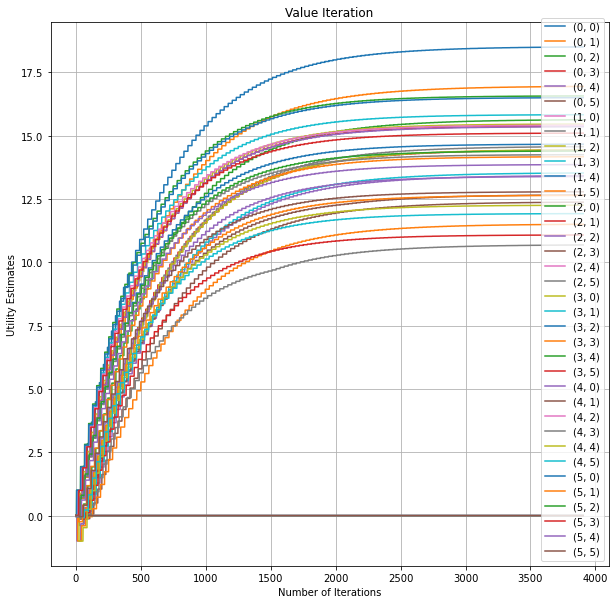

In [205]:
from matplotlib.pyplot import figure
x = [i for i in range(iterations)]

fig, ax = plt.subplots()
ax.plot(x, hist_0_0)
ax.plot(x, hist_0_1)
ax.plot(x, hist_0_2)
ax.plot(x, hist_0_3)
ax.plot(x, hist_0_4)
ax.plot(x, hist_0_5)

ax.plot(x, hist_1_0)
ax.plot(x, hist_1_1)
ax.plot(x, hist_1_2)
ax.plot(x, hist_1_3)
ax.plot(x, hist_1_4)
ax.plot(x, hist_1_5)

ax.plot(x, hist_2_0)
ax.plot(x, hist_2_1)
ax.plot(x, hist_2_2)
ax.plot(x, hist_2_3)
ax.plot(x, hist_2_4)
ax.plot(x, hist_2_5)

ax.plot(x, hist_3_0)
ax.plot(x, hist_3_1)
ax.plot(x, hist_3_2)
ax.plot(x, hist_3_3)
ax.plot(x, hist_3_4)
ax.plot(x, hist_3_5)

ax.plot(x, hist_4_0)
ax.plot(x, hist_4_1)
ax.plot(x, hist_4_2)
ax.plot(x, hist_4_3)
ax.plot(x, hist_4_4)
ax.plot(x, hist_4_5)

ax.plot(x, hist_5_0)
ax.plot(x, hist_5_1)
ax.plot(x, hist_5_2)
ax.plot(x, hist_5_3)
ax.plot(x, hist_5_4)
ax.plot(x, hist_5_5)

plt.legend(list_of_tuples, loc ="lower right")

plt.rcParams["figure.figsize"]=10,10

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates', title='Value Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

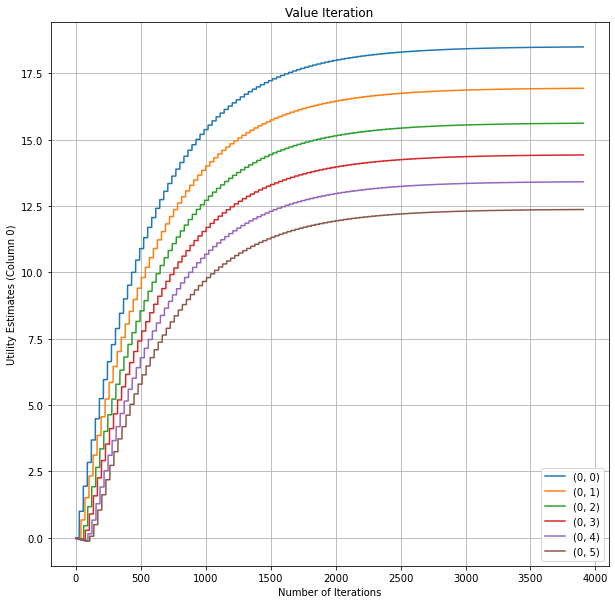

In [206]:
#Column 0

fig, ax = plt.subplots()
ax.plot(x, hist_0_0)
ax.plot(x, hist_0_1)
ax.plot(x, hist_0_2)
ax.plot(x, hist_0_3)
ax.plot(x, hist_0_4)
ax.plot(x, hist_0_5)

plt.legend(list_of_tuples, loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 0)', title='Value Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

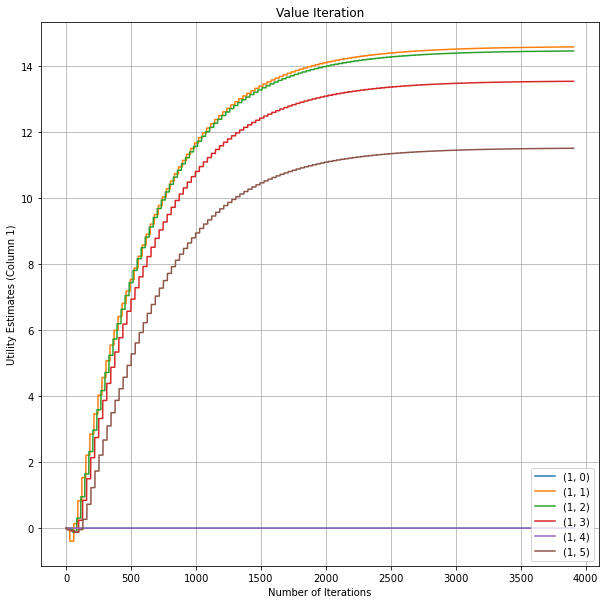

In [207]:
#Column 1

fig, ax = plt.subplots()
ax.plot(x, hist_1_0)
ax.plot(x, hist_1_1)
ax.plot(x, hist_1_2)
ax.plot(x, hist_1_3)
ax.plot(x, hist_1_4)
ax.plot(x, hist_1_5)

plt.legend(list_of_tuples[6:12], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 1)', title='Value Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

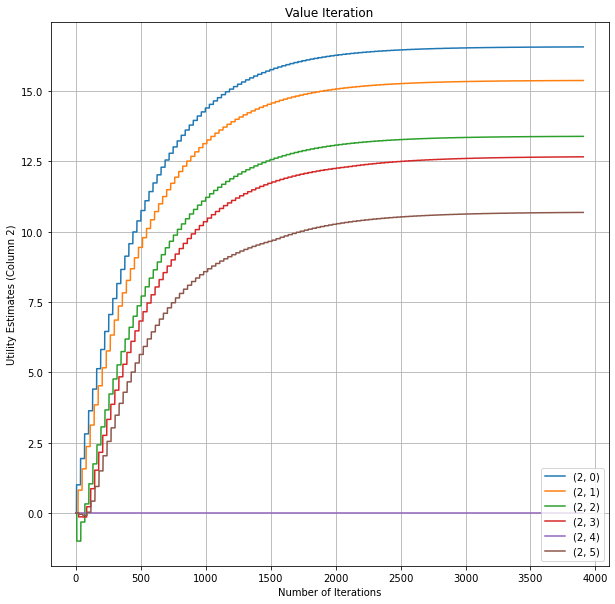

In [208]:
#Column 2

fig, ax = plt.subplots()
ax.plot(x, hist_2_0)
ax.plot(x, hist_2_1)
ax.plot(x, hist_2_2)
ax.plot(x, hist_2_3)
ax.plot(x, hist_2_4)
ax.plot(x, hist_2_5)

plt.legend(list_of_tuples[12:18], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 2)', title='Value Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

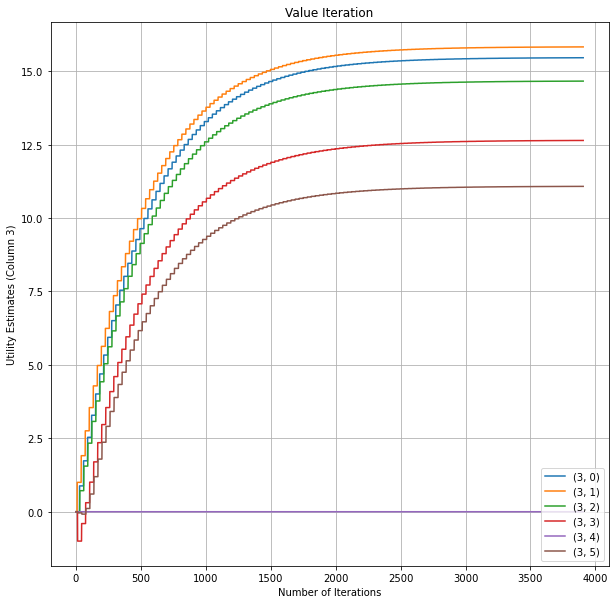

In [209]:
#Column 3

fig, ax = plt.subplots()
ax.plot(x, hist_3_0)
ax.plot(x, hist_3_1)
ax.plot(x, hist_3_2)
ax.plot(x, hist_3_3)
ax.plot(x, hist_3_4)
ax.plot(x, hist_3_5)

plt.legend(list_of_tuples[18:24], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 3)', title='Value Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

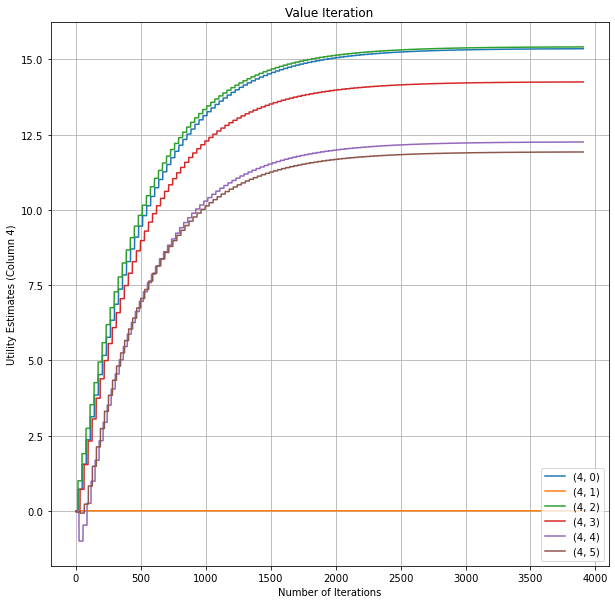

In [210]:
#Column 4

fig, ax = plt.subplots()
ax.plot(x, hist_4_0)
ax.plot(x, hist_4_1)
ax.plot(x, hist_4_2)
ax.plot(x, hist_4_3)
ax.plot(x, hist_4_4)
ax.plot(x, hist_4_5)

plt.legend(list_of_tuples[24:30], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 4)', title='Value Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()

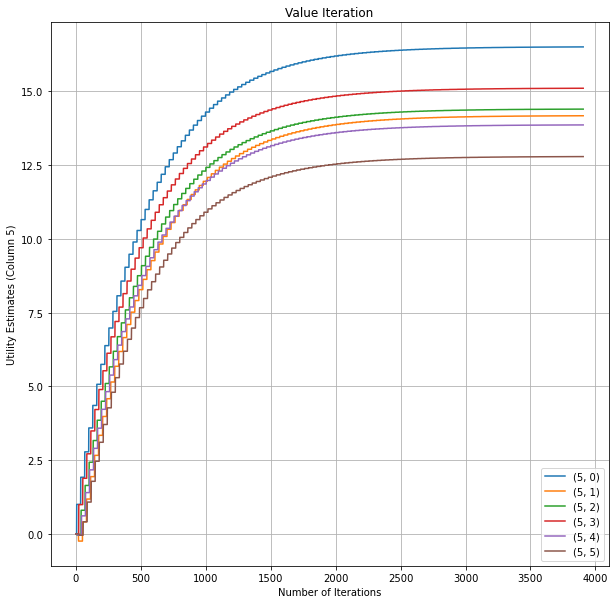

In [211]:
#Column 5

fig, ax = plt.subplots()
ax.plot(x, hist_5_0)
ax.plot(x, hist_5_1)
ax.plot(x, hist_5_2)
ax.plot(x, hist_5_3)
ax.plot(x, hist_5_4)
ax.plot(x, hist_5_5)

plt.legend(list_of_tuples[30:36], loc ="lower right")

ax.set(xlabel='Number of Iterations', ylabel='Utility Estimates (Column 5)', title='Value Iteration')
ax.grid()

fig.savefig("test.png")
plt.show()